In [181]:
from IPython.display import display, HTML

html_code = """
<div style="font-family: 'Arial', sans-serif; margin: 0; padding: 0; background-color: #f3f4f6; color: #333;">
    <header style="background-color: #4a90e2; color: white; padding: 20px; text-align: center; font-size: 24px;">
        LOAN DEFAULT DATASET
    </header>
    <nav style="display: flex; justify-content: center; background-color: #2c3e50; padding: 10px;">
        <a href="#introduccion" style="color: white; margin: 0 15px; text-decoration: none; font-size: 18px;">INTRODUCCION</a>
        <a href="#eda" style="color: white; margin: 0 15px; text-decoration: none; font-size: 18px;">EDA</a>
        <a href="#modelo" style="color: white; margin: 0 15px; text-decoration: none; font-size: 18px;">MODELO</a>
        <a href="#conclusiones" style="color: white; margin: 0 15px; text-decoration: none; font-size: 18px;">CONCLUSIONES</a>
    </nav>
</div>
"""

display(HTML(html_code))


# INTRODUCCION

El término "loan default" (incumplimiento de préstamo) se refiere a una situación en la que un prestatario no cumple con las condiciones de un préstamo, especialmente en lo que respecta a los pagos programados de intereses y/o el principal. Esto puede ocurrir por diversas razones, incluyendo dificultades financieras del prestatario, pérdida de empleo, o problemas económicos más amplios.La influencia de estos factores del mundo real que pueden afectar la evaluación del riesgo crediticio y el comportamiento del prestatario.


## Problema

Los bancos generan una gran parte de sus ingresos a partir de la concesión de préstamos. Sin embargo, esto conlleva un riesgo, ya que los prestatarios pueden incumplir con el pago del préstamo. Los métodos tradicionales de evaluación de riesgo pueden no ser suficientes para predecir de manera precisa si un prestatario incumplirá o no. Para mitigar este problema, los bancos han decidido utilizar Machine Learning. 

## Objetivo Principal

Desarrollar un modelo de Machine Learning robusto que pueda predecir si un nuevo prestatario es probable que incumpla con un préstamo hipotecario o no, utilizando datos históricos sobre prestatarios y diversas características determinísticas.Status es mi variable objetivo.

## Objetivos Secundarios

1. Identificar los insights más importantes sobre la influencia de los atributos del cliente en el riesgo de incumplimiento.
2. Proporcionar a los bancos una comprensión detallada de los factores que impulsan el riesgo de incumplimiento y sugerir estrategias para contrarrestarlo.
3. Documentar el proceso de desarrollo del modelo y compartir el código en un repositorio público en GitHub para su revisión, colaboración y uso como referencia para futuras investigaciones y análisis relacionados con el proyecto.

In [182]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [183]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [184]:
pip install nbformat

Note: you may need to restart the kernel to use updated packages.


In [185]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [186]:
import nbformat
print(nbformat.__version__)

5.10.4


In [282]:
pip install nbformat

Note: you may need to restart the kernel to use updated packages.


In [187]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [352]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import missingno as msno
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.decomposition import PCA
import plotly.graph_objects as go

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix, roc_curve, auc

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, classification_report

In [189]:
df = pd.read_csv(Path("E:/1. Coding Dojo - Es Hoy/Proyecto final/Loan_Default.csv"))
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


# EDA

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [191]:
column_info = {}

for column in df.columns:
    column_info[column] = {
        "Tipo de Dato": df[column].dtype,
        "Valores Únicos": df[column].nunique(),
        "Primeros 5 Valores Únicos": df[column].dropna().unique()[:5].tolist()
    }

column_info_df = pd.DataFrame(column_info).T

display(column_info_df)

,Tipo de Dato,Valores Únicos,Primeros 5 Valores Únicos
ID,int64,148670,"[24890, 24891, 24892, 24893, 24894]"
year,int64,1,[2019]
loan_limit,object,2,"[cf, ncf]"
Gender,object,4,"[Sex Not Available, Male, Joint, Female]"
approv_in_adv,object,2,"[nopre, pre]"
loan_type,object,3,"[type1, type2, type3]"
loan_purpose,object,4,"[p1, p4, p3, p2]"
Credit_Worthiness,object,2,"[l1, l2]"
open_credit,object,2,"[nopc, opc]"
business_or_commercial,object,2,"[nob/c, b/c]"


Tenemos 34 caracteristicas y 14,8670 registros, en base a esta información realizamos una descripción inicial de los datos.

| Columna                        | Tipo de Dato | Valores Únicos | Primeros 5 Valores Únicos                   | Descripción                                                                 |
|--------------------------------|--------------|----------------|---------------------------------------------|-----------------------------------------------------------------------------|
| ID                             | int64        | 148670         | [24890, 24891, 24892, 24893, 24894]         | Identificador único de cada préstamo.                                       |
| year                           | int64        | 1              | [2019]                                      | Año en que se registraron los datos.                                        |
| loan_limit                     | object       | 2              | [cf, ncf]                                   | Límite del préstamo (cf = conforme/con límite, ncf = no conforme/sin límite).                    |
| Gender                         | object       | 4              | [Sex Not Available, Male, Joint, Female]    | Género del prestatario.                                                     |
| approv_in_adv                  | object       | 2              | [nopre, pre]                                | Aprobación previa del préstamo (nopre = no previa, pre = previa).           |
| loan_type                      | object       | 3              | [type1, type2, type3]                       | Tipo de préstamo.                                                           |
| loan_purpose                   | object       | 4              | [p1, p4, p3, p2]                            | Propósito del préstamo.                                                     |
| Credit_Worthiness              | object       | 2              | [l1, l2]                                    | Valoración crediticia del prestatario.                                      |
| open_credit                    | object       | 2              | [nopc, opc]                                 | Disponibilidad de crédito abierto (nopc = no open credit/no, opc = open credit/sí).                    |
| business_or_commercial         | object       | 2              | [nob/c, b/c]                                | Indica si el préstamo es para negocios o comercial (nob/c = no, b/c = sí).  |
| loan_amount                    | int64        | 211            | [116500, 206500, 406500, 456500, 696500]    | Monto total del préstamo otorgado.                                          |
| rate_of_interest               | float64      | 131            | [4.56, 4.25, 4.0, 3.99, 4.5]                | Tasa de interés aplicada al préstamo (%).                                   |
| Interest_rate_spread           | float64      | 22516          | [0.2, 0.681, 0.3042, 0.1523, 0.9998]        | Diferencia entre la tasa de interés específica del préstamo y la tasa de referencia.                                          |
| Upfront_charges                | float64      | 58271          | [595.0, 0.0, 370.0, 5120.0, 5609.88]        | Cargos iniciales pagados al inicio del préstamo.                                                           |
| term                           | float64      | 26             | [360.0, 300.0, 180.0, 312.0, 144.0]         | Duración del préstamo en meses.                                             |
| Neg_ammortization              | object       | 2              | [not_neg, neg_amm]                          | Amortización negativa (not_neg = no, neg_amm = sí).                         |
| interest_only                  | object       | 2              | [not_int, int_only]                         | Indica si el préstamo es solo intereses durante un período específico (not_int = no, int_only = sí).                  |
| lump_sum_payment               | object       | 2              | [not_lpsm, lpsm]                            | Indica si el préstamo incluye un pago único grande al final del término (not_lpsm = no, lpsm = sí).                      |
| property_value                 | float64      | 385            | [118000.0, 508000.0, 658000.0, 758000.0, 10080.0] | Valor de la propiedad.                                                 |
| construction_type              | object       | 2              | [sb, mh]                                    | Tipo de construcción (sb = site built/sitio construido, mh = Manufactured home/casa móvil).              |
| occupancy_type                 | object       | 3              | [pr, sr, ir]                                | Tipo de ocupación (pr = primary residence/propietario, sr = second residence/arrendatario, ir = investment residence/inversionista).|
| Secured_by                     | object       | 2              | [home, land]                                | Garantizado por (home = hogar, land = tierra).                              |
| total_units                    | object       | 4              | [1U, 2U, 3U, 4U]                            | Número total de unidades (1U = flat, 2U = duplex, 3U = triplex, 4U= cuadruplex).                                                   |
| income                         | float64      | 1001           | [1740.0, 4980.0, 9480.0, 11880.0, 10440.0]  | Ingresos del prestatario.                                                   |
| credit_type                    | object       | 4              | [EXP, EQUI, CRIF, CIB]                      | Tipo de crédito (EXP = Experian, EQUI = Equifax, CRIF = CRIF, CIB = Credit Information Bureau).                                                            |
| Credit_Score                   | int64        | 401            | [758, 552, 834, 587, 602]                   | Puntuación crediticia del prestatario.                                      |
| co-applicant_credit_type       | object       | 2              | [CIB, EXP]                                  | Tipo de crédito del co-solicitante (CIB = Credit Information Bureau, EXP = Experian).                                         |
| age                            | object       | 7              | [25-34, 55-64, 35-44, 45-54, 65-74]         | Rango de edad del prestatario.                                              |
| submission_of_application      | object       | 2              | [to_inst, not_inst]                         | Presentación de la solicitud (to_inst = a la institución, not_inst = no a la institución/ realizado a través de brokers o intermediarios). |
| LTV                            | float64      | 8484           | [98.72881356, 80.01968504, 69.3768997, 91.8865, 88.13] | Relación préstamo-valor.                                             |
| Region                         | object       | 4              | [south, North, central, North-East]         | Región geográfica.                                                          |
| Security_Type                  | object       | 2              | [direct, Indriect]                          | Tipo de seguro (direct = directo/garantía es la misma propiedad, Indriect = indirecto/garantía es otra propiedad o bien).                 |
| Status                         | int64        | 2              | [1, 0]                                      | Estado del préstamo (1 = activo, 0 = inactivo).                             |
| dtir1                          | float64      | 57             | [45.0, 46.0, 42.0, 39.0, 40.0]              | Porcentaje deuda-ingreso. 

In [192]:
df.columns=df.columns.str.lower()

df['id'] = df['id'].astype(str)

df.drop(columns=['year'], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         148670 non-null  object 
 1   loan_limit                 145326 non-null  object 
 2   gender                     148670 non-null  object 
 3   approv_in_adv              147762 non-null  object 
 4   loan_type                  148670 non-null  object 
 5   loan_purpose               148536 non-null  object 
 6   credit_worthiness          148670 non-null  object 
 7   open_credit                148670 non-null  object 
 8   business_or_commercial     148670 non-null  object 
 9   loan_amount                148670 non-null  int64  
 10  rate_of_interest           112231 non-null  float64
 11  interest_rate_spread       112031 non-null  float64
 12  upfront_charges            109028 non-null  float64
 13  term                       14

In [193]:
nas = df.isna().sum()
print(nas)

id                               0
loan_limit                    3344
gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
credit_worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
interest_rate_spread         36639
upfront_charges              39642
term                            41
neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
secured_by                       0
total_units                      0
income                        9150
credit_type                      0
credit_score                     0
co-applicant_credit_type         0
age                            200
submission_of_application      200
ltv                 

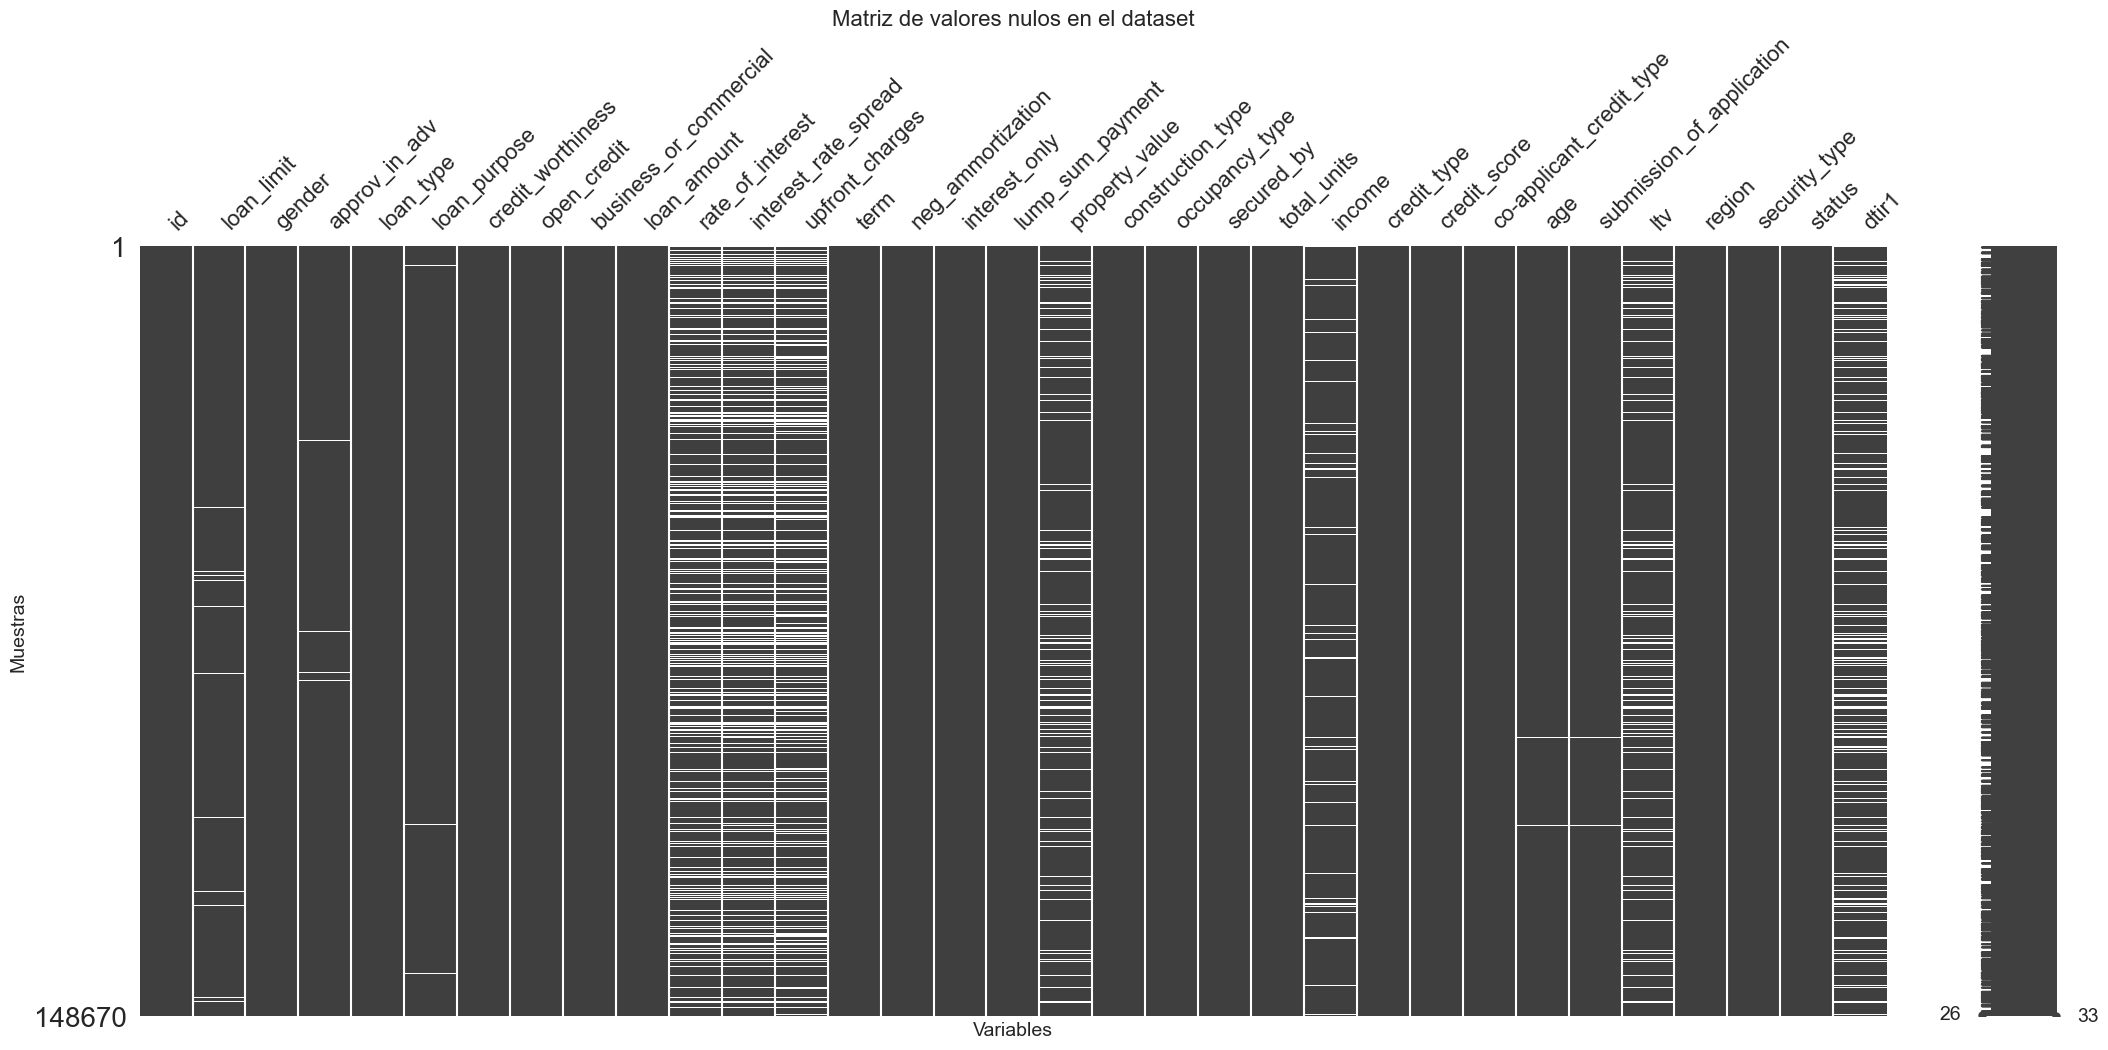

In [194]:
msno.matrix(df)

plt.title('Matriz de valores nulos en el dataset', fontsize=16)
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Muestras', fontsize=14)

plt.show()

In [195]:
df.duplicated().sum()

0

<Axes: >

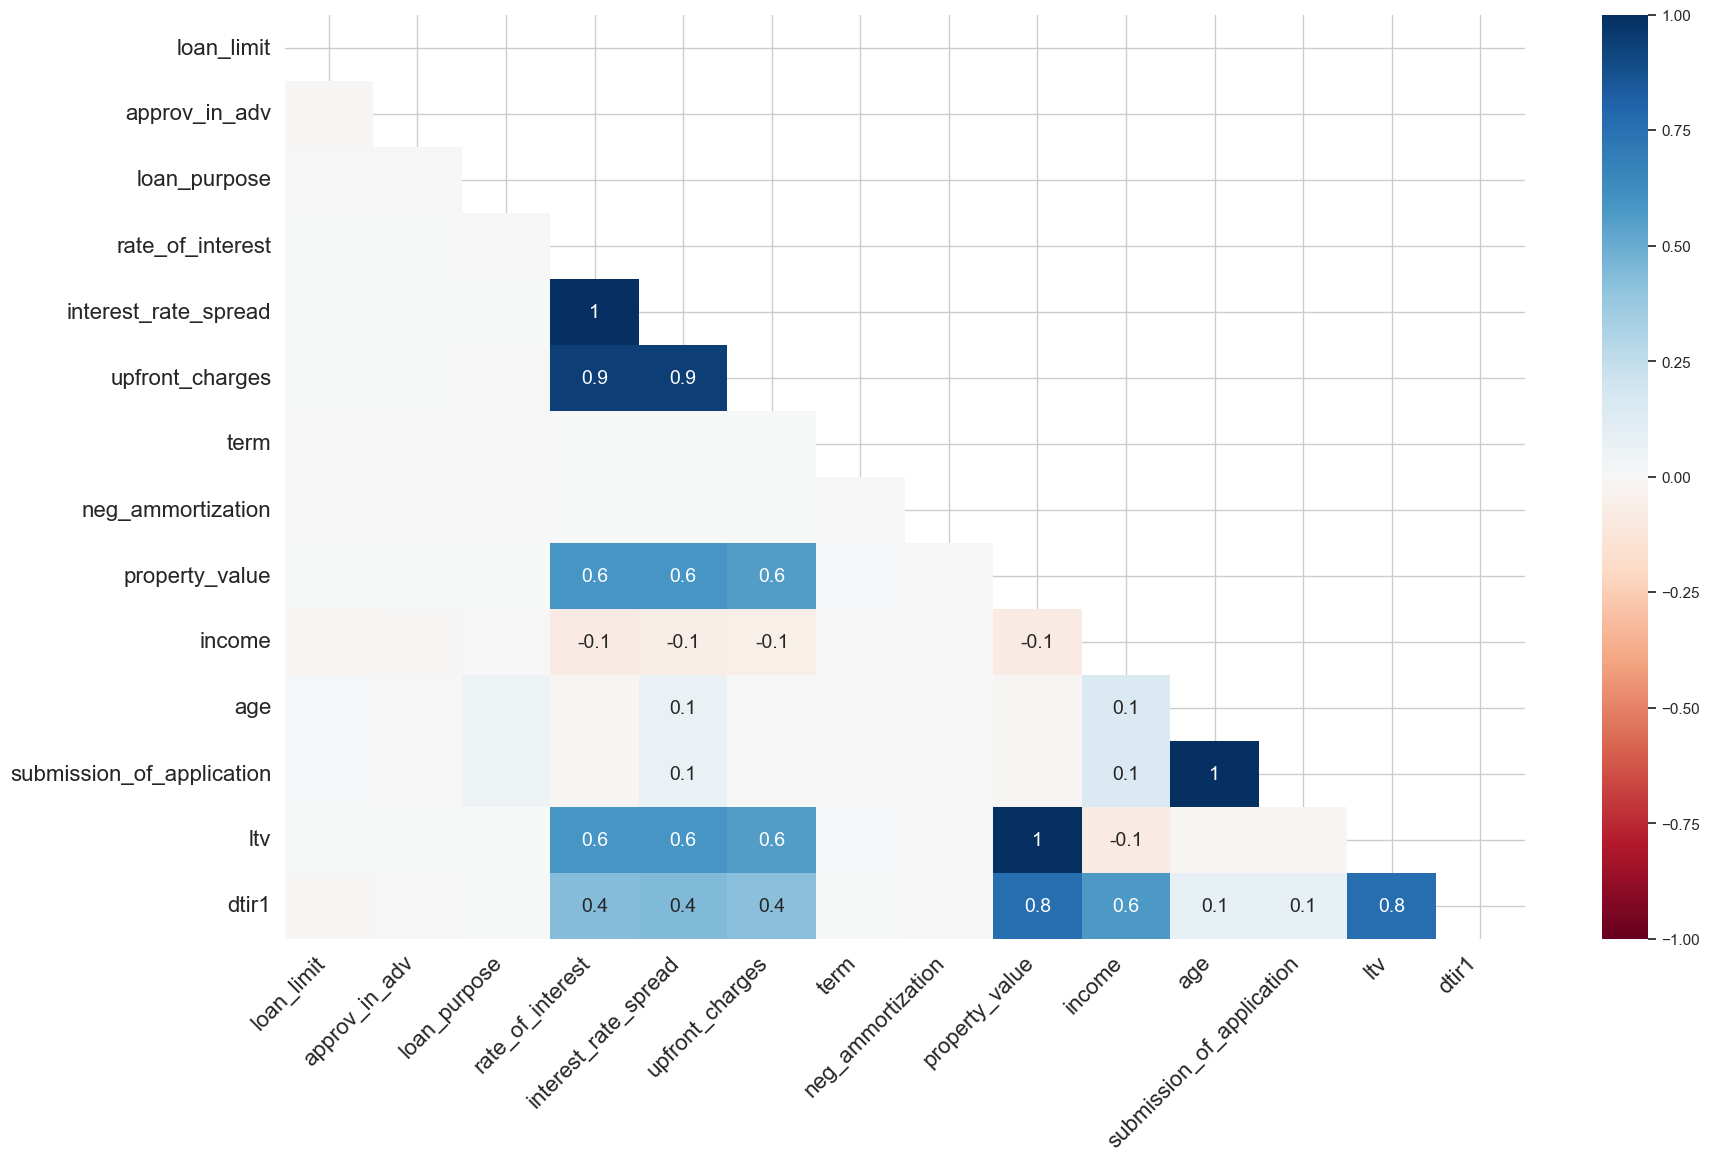

In [196]:
msno.heatmap(df, labels = True)

In [197]:
missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
missing_columns

['loan_limit',
 'approv_in_adv',
 'loan_purpose',
 'rate_of_interest',
 'interest_rate_spread',
 'upfront_charges',
 'term',
 'neg_ammortization',
 'property_value',
 'income',
 'age',
 'submission_of_application',
 'ltv',
 'dtir1']

<Axes: >

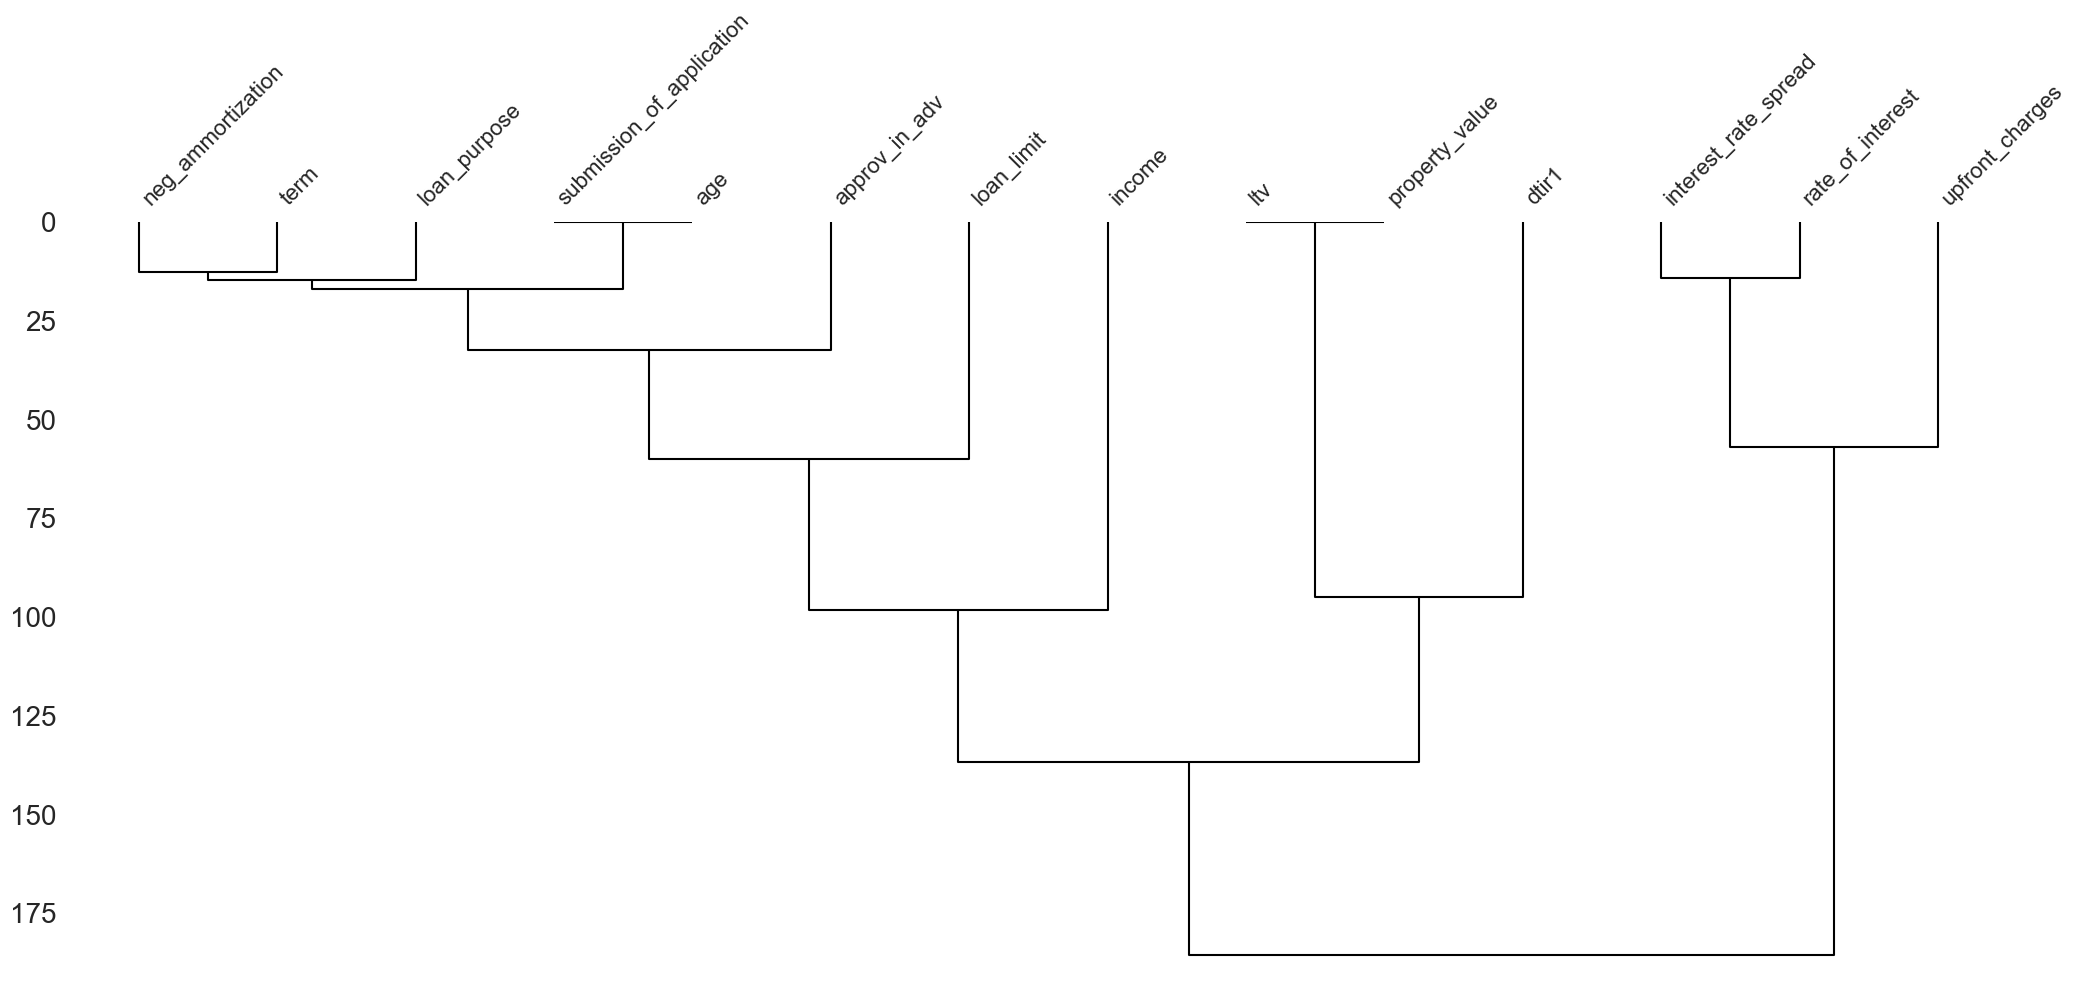

In [198]:
msno.dendrogram(df[missing_columns])

Las columnas neg_ammortization, term, loan_purpose, submission_of_application y age forman un grupo, lo que sugiere que tienen patrones de valores faltantes similares.
Otro grupo es approv_in_adv, loan_limit, income.
Columnas como ltv, property_value, dtir1 también forman otro grupo.


In [199]:
dtypes = pd.DataFrame(df.dtypes).reset_index()

cat_vars = []
num_vars = []
for i, l in zip(dtypes['index'], dtypes[0]):
    if l == 'object':
        cat_vars.append(i)
    else:
        num_vars.append(i)

Otro enfoque para manejar los valores faltantes es imputarlos o estimarlos. La imputación utiliza la información y las relaciones entre los atributos no faltantes para proporcionar una estimación que complete el valor faltante.

In [200]:
df_num = df[num_vars]

knn = KNNImputer(n_neighbors = 3)
knn.fit(df_num)
X = knn.fit_transform(df_num)

df_num = pd.DataFrame(X, columns=num_vars)
nas_num = df_num.isna().sum()
print(nas_num)

loan_amount             0
rate_of_interest        0
interest_rate_spread    0
upfront_charges         0
term                    0
property_value          0
income                  0
credit_score            0
ltv                     0
status                  0
dtir1                   0
dtype: int64


## Imputando los valores Numéricos

In [201]:
df_num = df[num_vars]

knn = KNNImputer(n_neighbors = 3)
knn.fit(df_num)
X = knn.fit_transform(df_num)

df_num = pd.DataFrame(X, columns=num_vars)
nas_num = df_num.isna().sum()
print(nas_num)

loan_amount             0
rate_of_interest        0
interest_rate_spread    0
upfront_charges         0
term                    0
property_value          0
income                  0
credit_score            0
ltv                     0
status                  0
dtir1                   0
dtype: int64


## Imputando los valores Categoricos

In [202]:
df_cat = df[cat_vars]

for i in cat_vars:
    mode = df[i].mode()
    mode = mode[0]
    df_cat[i].fillna(value=mode, inplace=True)

nas_cat = df_cat.isna().sum()
print(nas_cat)

df_full = pd.concat([df_num, df_cat], axis=1, join='inner')



C:\Users\User\AppData\Local\Temp\ipykernel_22456\2694575995.py:6: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\User\AppData\Local\Temp\ipykernel_22456\2694575995.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



id                           0
loan_limit                   0
gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
credit_worthiness            0
open_credit                  0
business_or_commercial       0
neg_ammortization            0
interest_only                0
lump_sum_payment             0
construction_type            0
occupancy_type               0
secured_by                   0
total_units                  0
credit_type                  0
co-applicant_credit_type     0
age                          0
submission_of_application    0
region                       0
security_type                0
dtype: int64


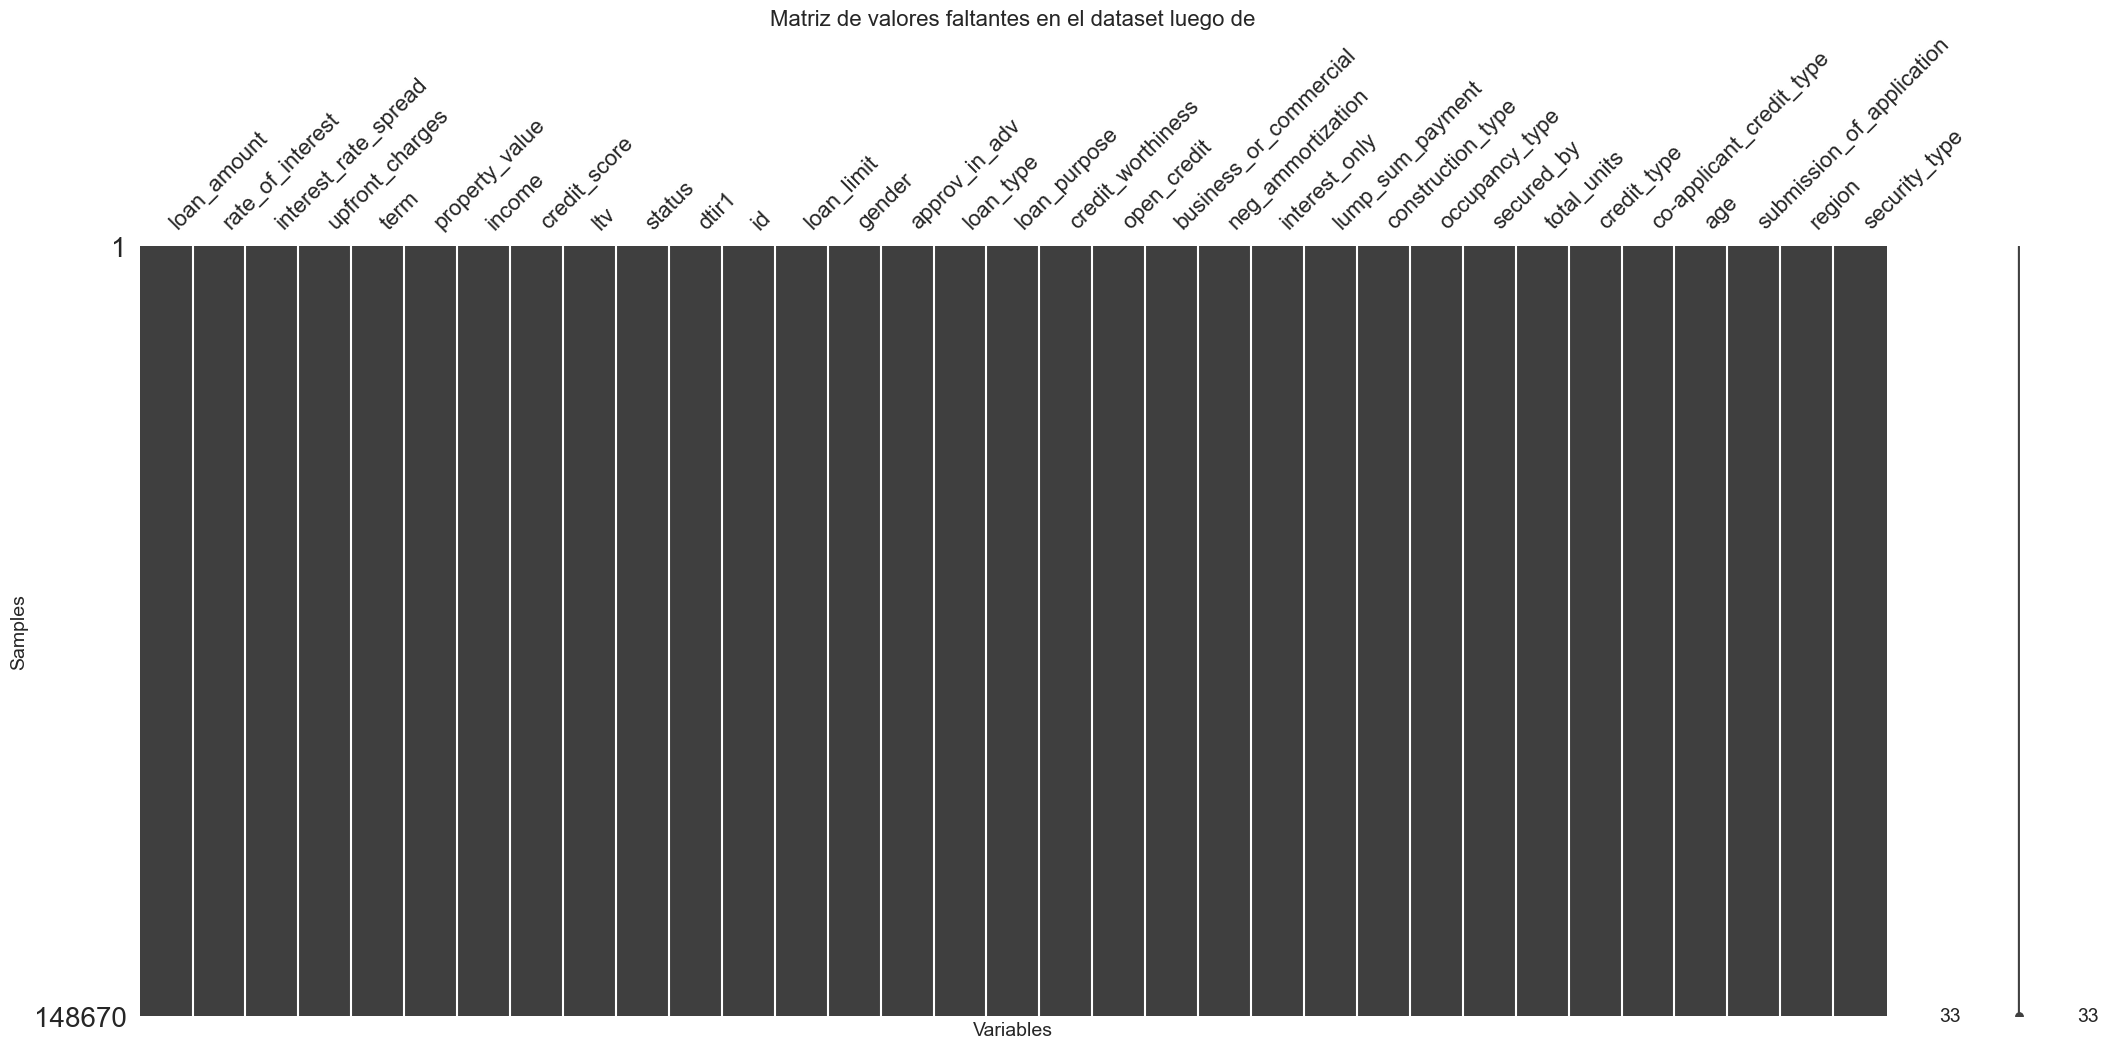

In [203]:
msno.matrix(df_full)

plt.title('Matriz de valores faltantes en el dataset luego de', fontsize=16)
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Samples', fontsize=14)
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_22456\3187866527.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\User\AppData\Local\Temp\ipykernel_22456\3187866527.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\User\AppData\Local\Temp\ipykernel_22456\3187866527.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\User\AppData\Local\Temp\ipykernel_22456\3187866527.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect

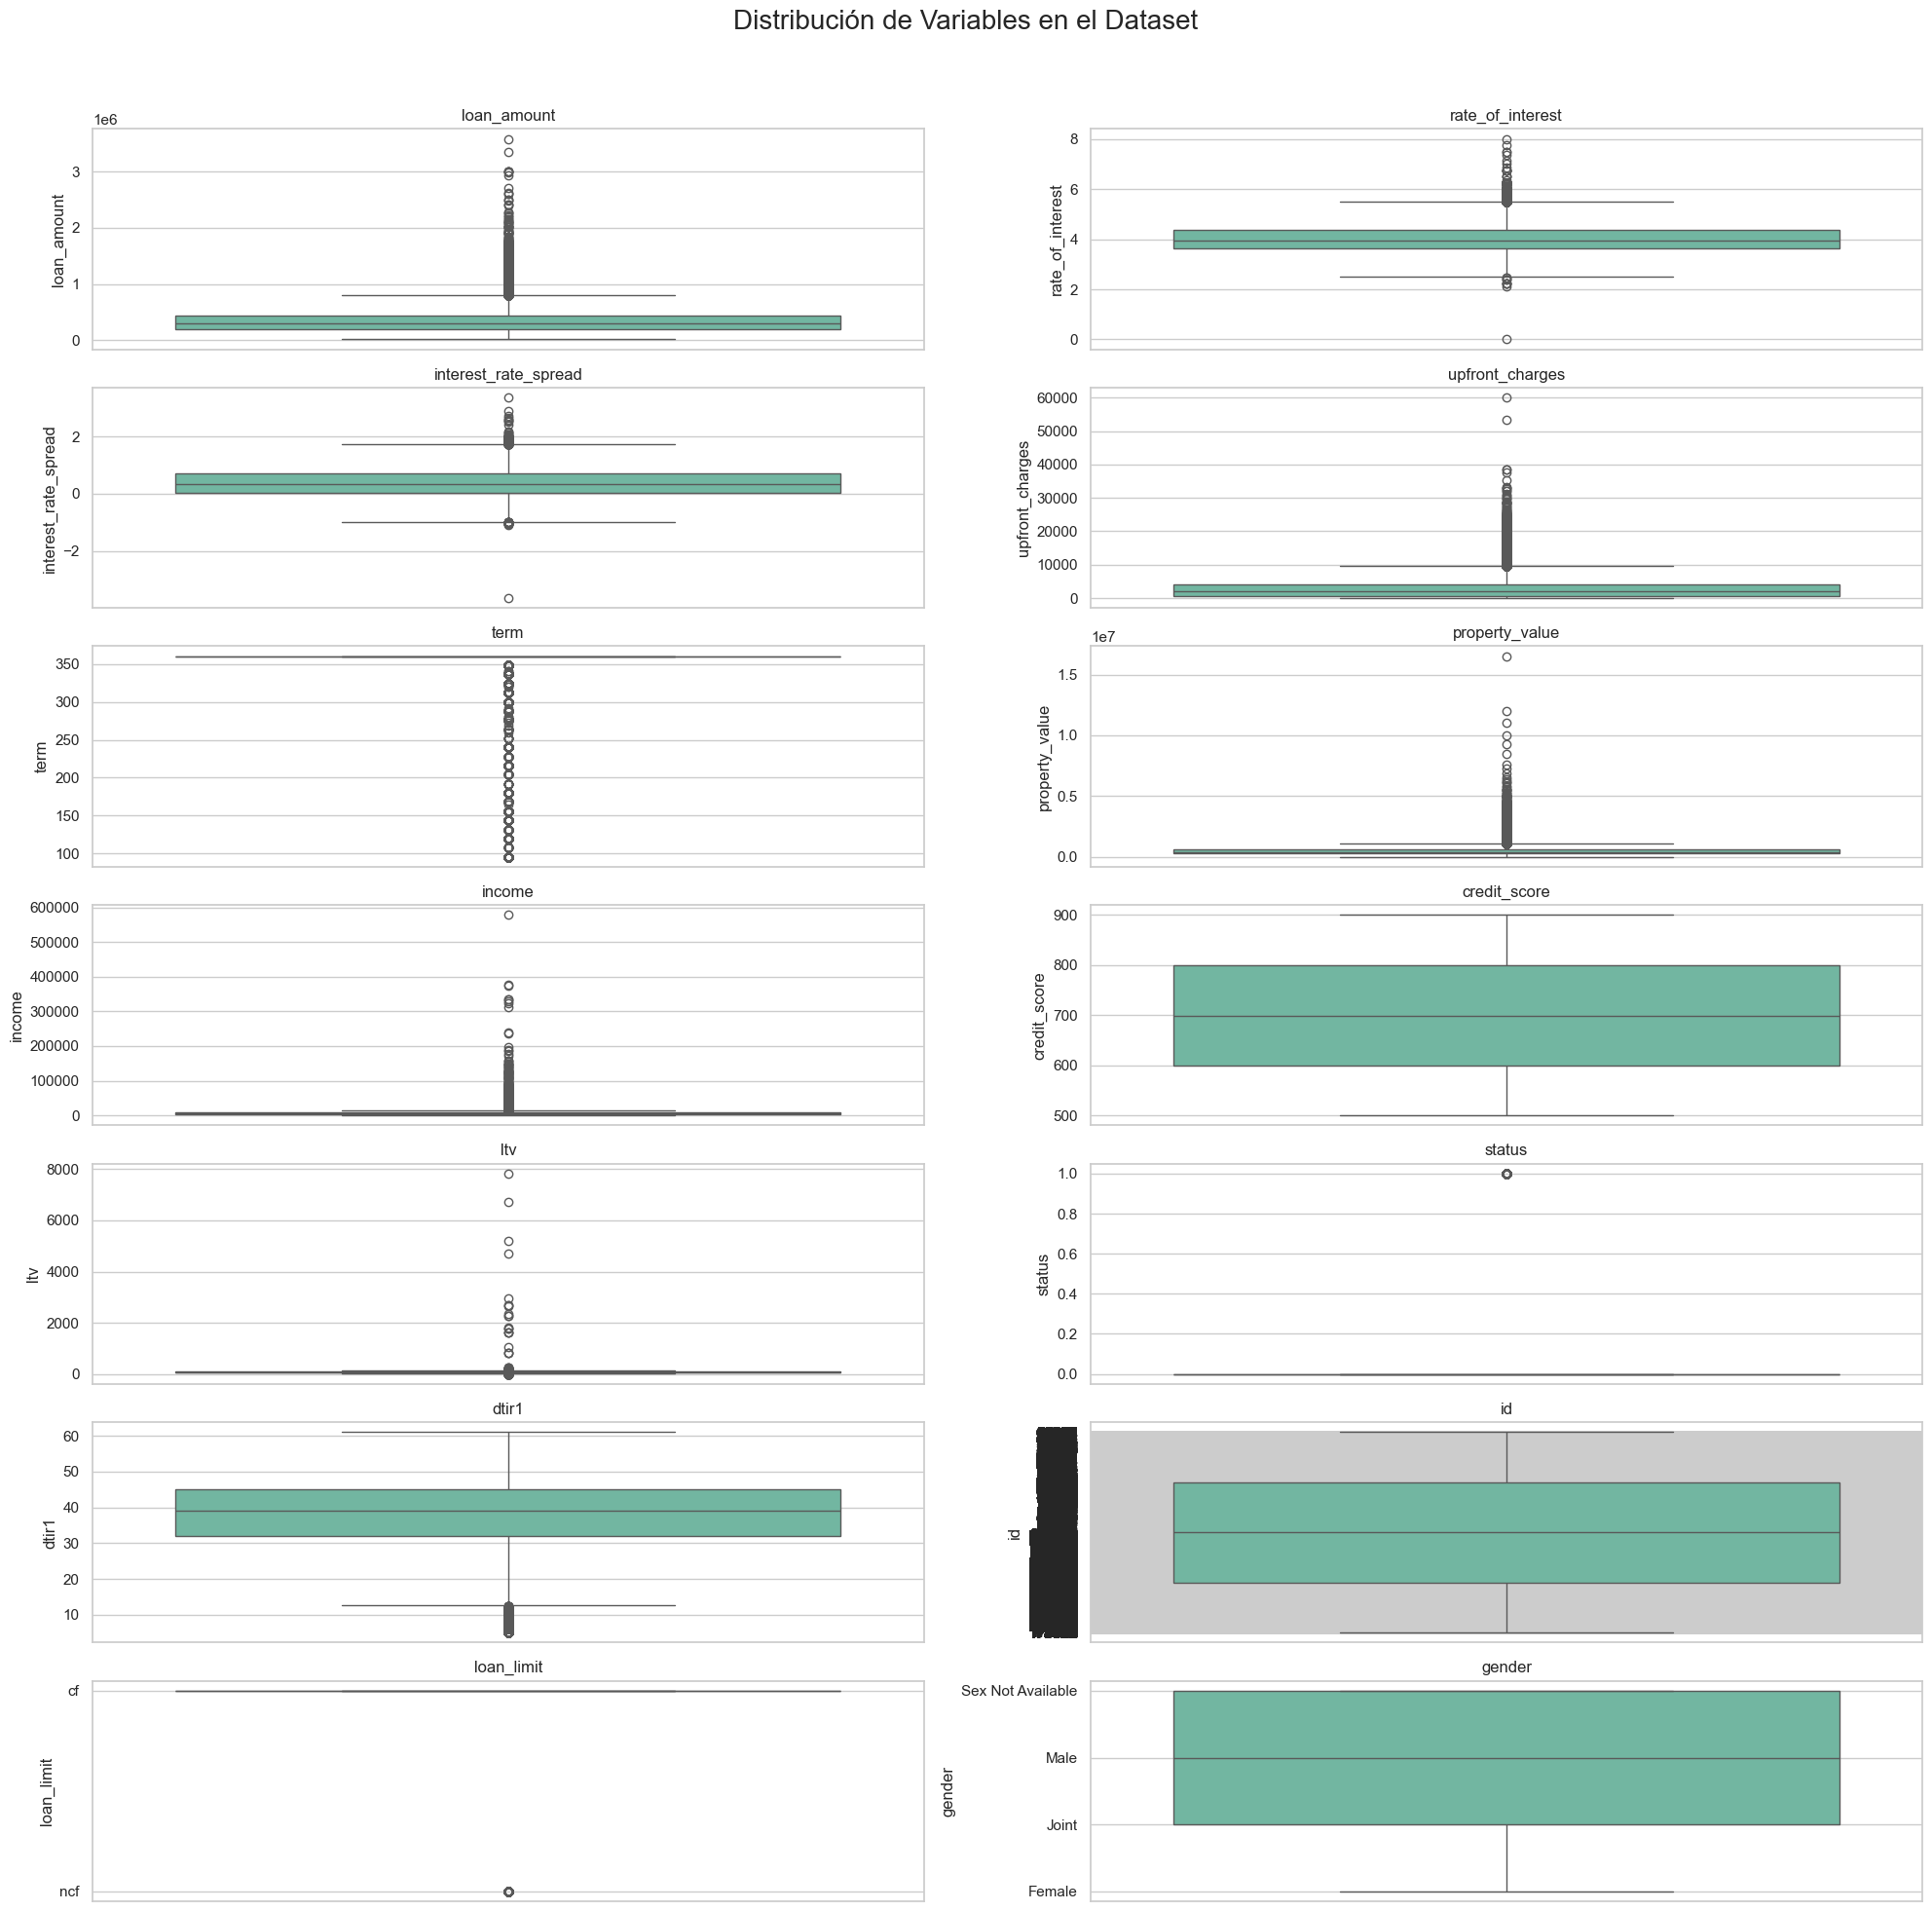

In [204]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(20, 20))
fig.suptitle('Distribución de Variables en el Dataset', fontsize=20)

axes = axes.flatten()

for ax, col in zip(axes, df_full.columns):
    sns.boxplot(y=df_full[col], ax=ax, palette="Set2")
    ax.set_title(col)

plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

Mi dataframe ahora es df_full

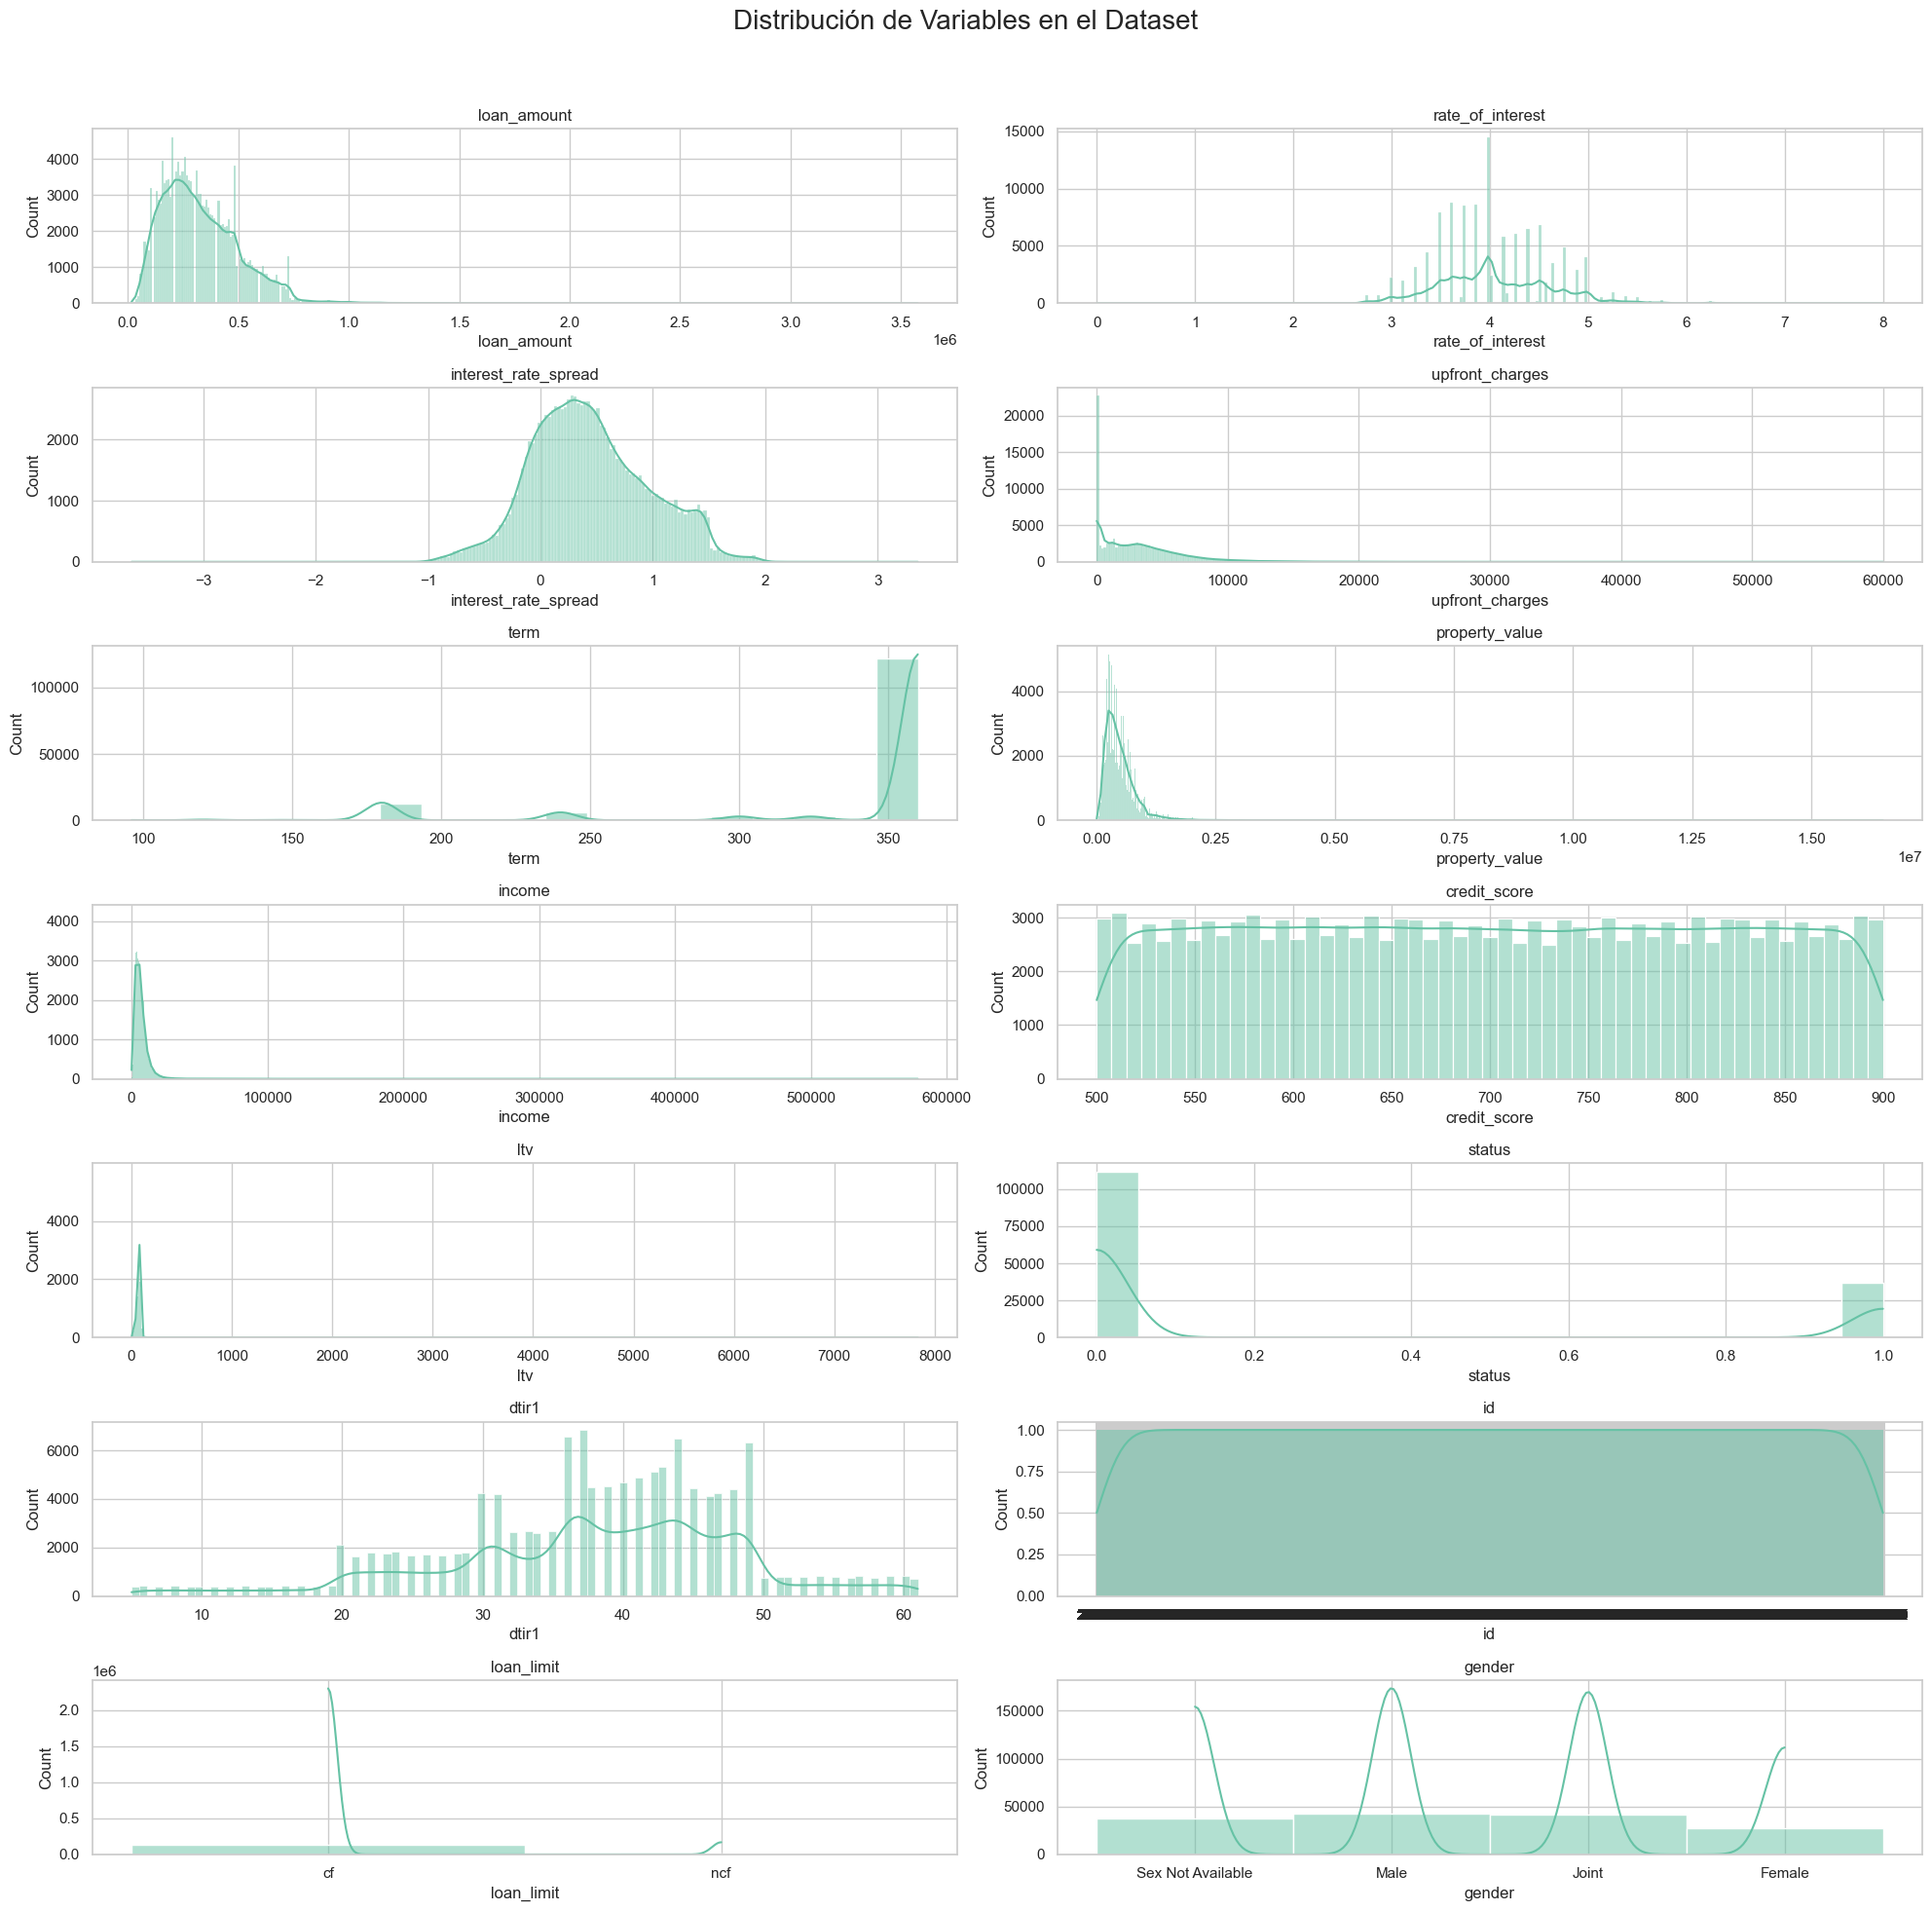

In [205]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(20, 20))
fig.suptitle('Distribución de Variables en el Dataset', fontsize=20)

axes = axes.flatten()

for ax, col in zip(axes, df_full.columns):
    sns.histplot(df[col], ax=ax, kde=True, color=sns.color_palette("Set2")[0])
    ax.set_title(col)

plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

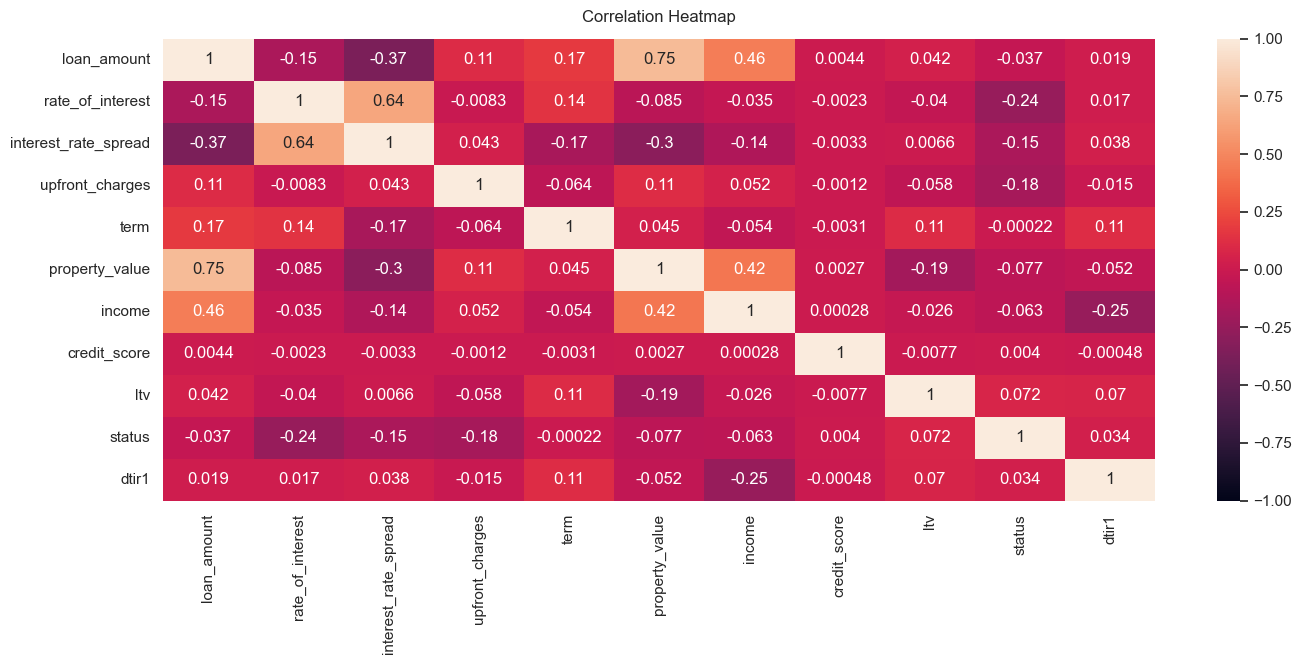

In [216]:
corr = df_num.corr()

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [217]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108261 entries, 0 to 148666
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_amount                108261 non-null  float64
 1   rate_of_interest           108261 non-null  float64
 2   interest_rate_spread       108261 non-null  float64
 3   upfront_charges            108261 non-null  float64
 4   term                       108261 non-null  float64
 5   property_value             108261 non-null  float64
 6   income                     108261 non-null  float64
 7   credit_score               108261 non-null  float64
 8   ltv                        108261 non-null  float64
 9   status                     108261 non-null  float64
 10  dtir1                      108261 non-null  float64
 11  id                         108261 non-null  object 
 12  loan_limit                 108261 non-null  object 
 13  gender                     108261 

In [218]:
def drop_outliers(df, field_name):
    if field_name not in df.columns:
        print(f"Column '{field_name}' does not exist in the DataFrame.")
        return df

    iqr = 1.5 * (np.percentile(df[field_name].dropna(), 75) - np.percentile(df[field_name].dropna(), 25))
    upper_bound = np.percentile(df[field_name].dropna(), 75) + iqr
    lower_bound = np.percentile(df[field_name].dropna(), 25) - iqr

    outliers = (df[field_name] > upper_bound) | (df[field_name] < lower_bound)
    if outliers.any():
        df = df[~outliers]
        print(f"Outliers removed from column '{field_name}'.")
    else:
        print(f"No outliers to drop in column '{field_name}'.")

    return df

# Lista de columnas a procesar
columns_to_check = [
    "loan_amount", "rate_of_interest", "Interest_rate_spread", "Upfront_charges", 
    "property_value", "income", "LTV", "Status", "term", "dtir1"
]

# Remover outliers para cada columna en la lista
for column in columns_to_check:
    df_full = drop_outliers(df_full, column)

Outliers removed from column 'loan_amount'.
No outliers to drop in column 'rate_of_interest'.
Column 'Interest_rate_spread' does not exist in the DataFrame.
Column 'Upfront_charges' does not exist in the DataFrame.
Outliers removed from column 'property_value'.
Outliers removed from column 'income'.
Column 'LTV' does not exist in the DataFrame.
Column 'Status' does not exist in the DataFrame.
No outliers to drop in column 'term'.
Outliers removed from column 'dtir1'.


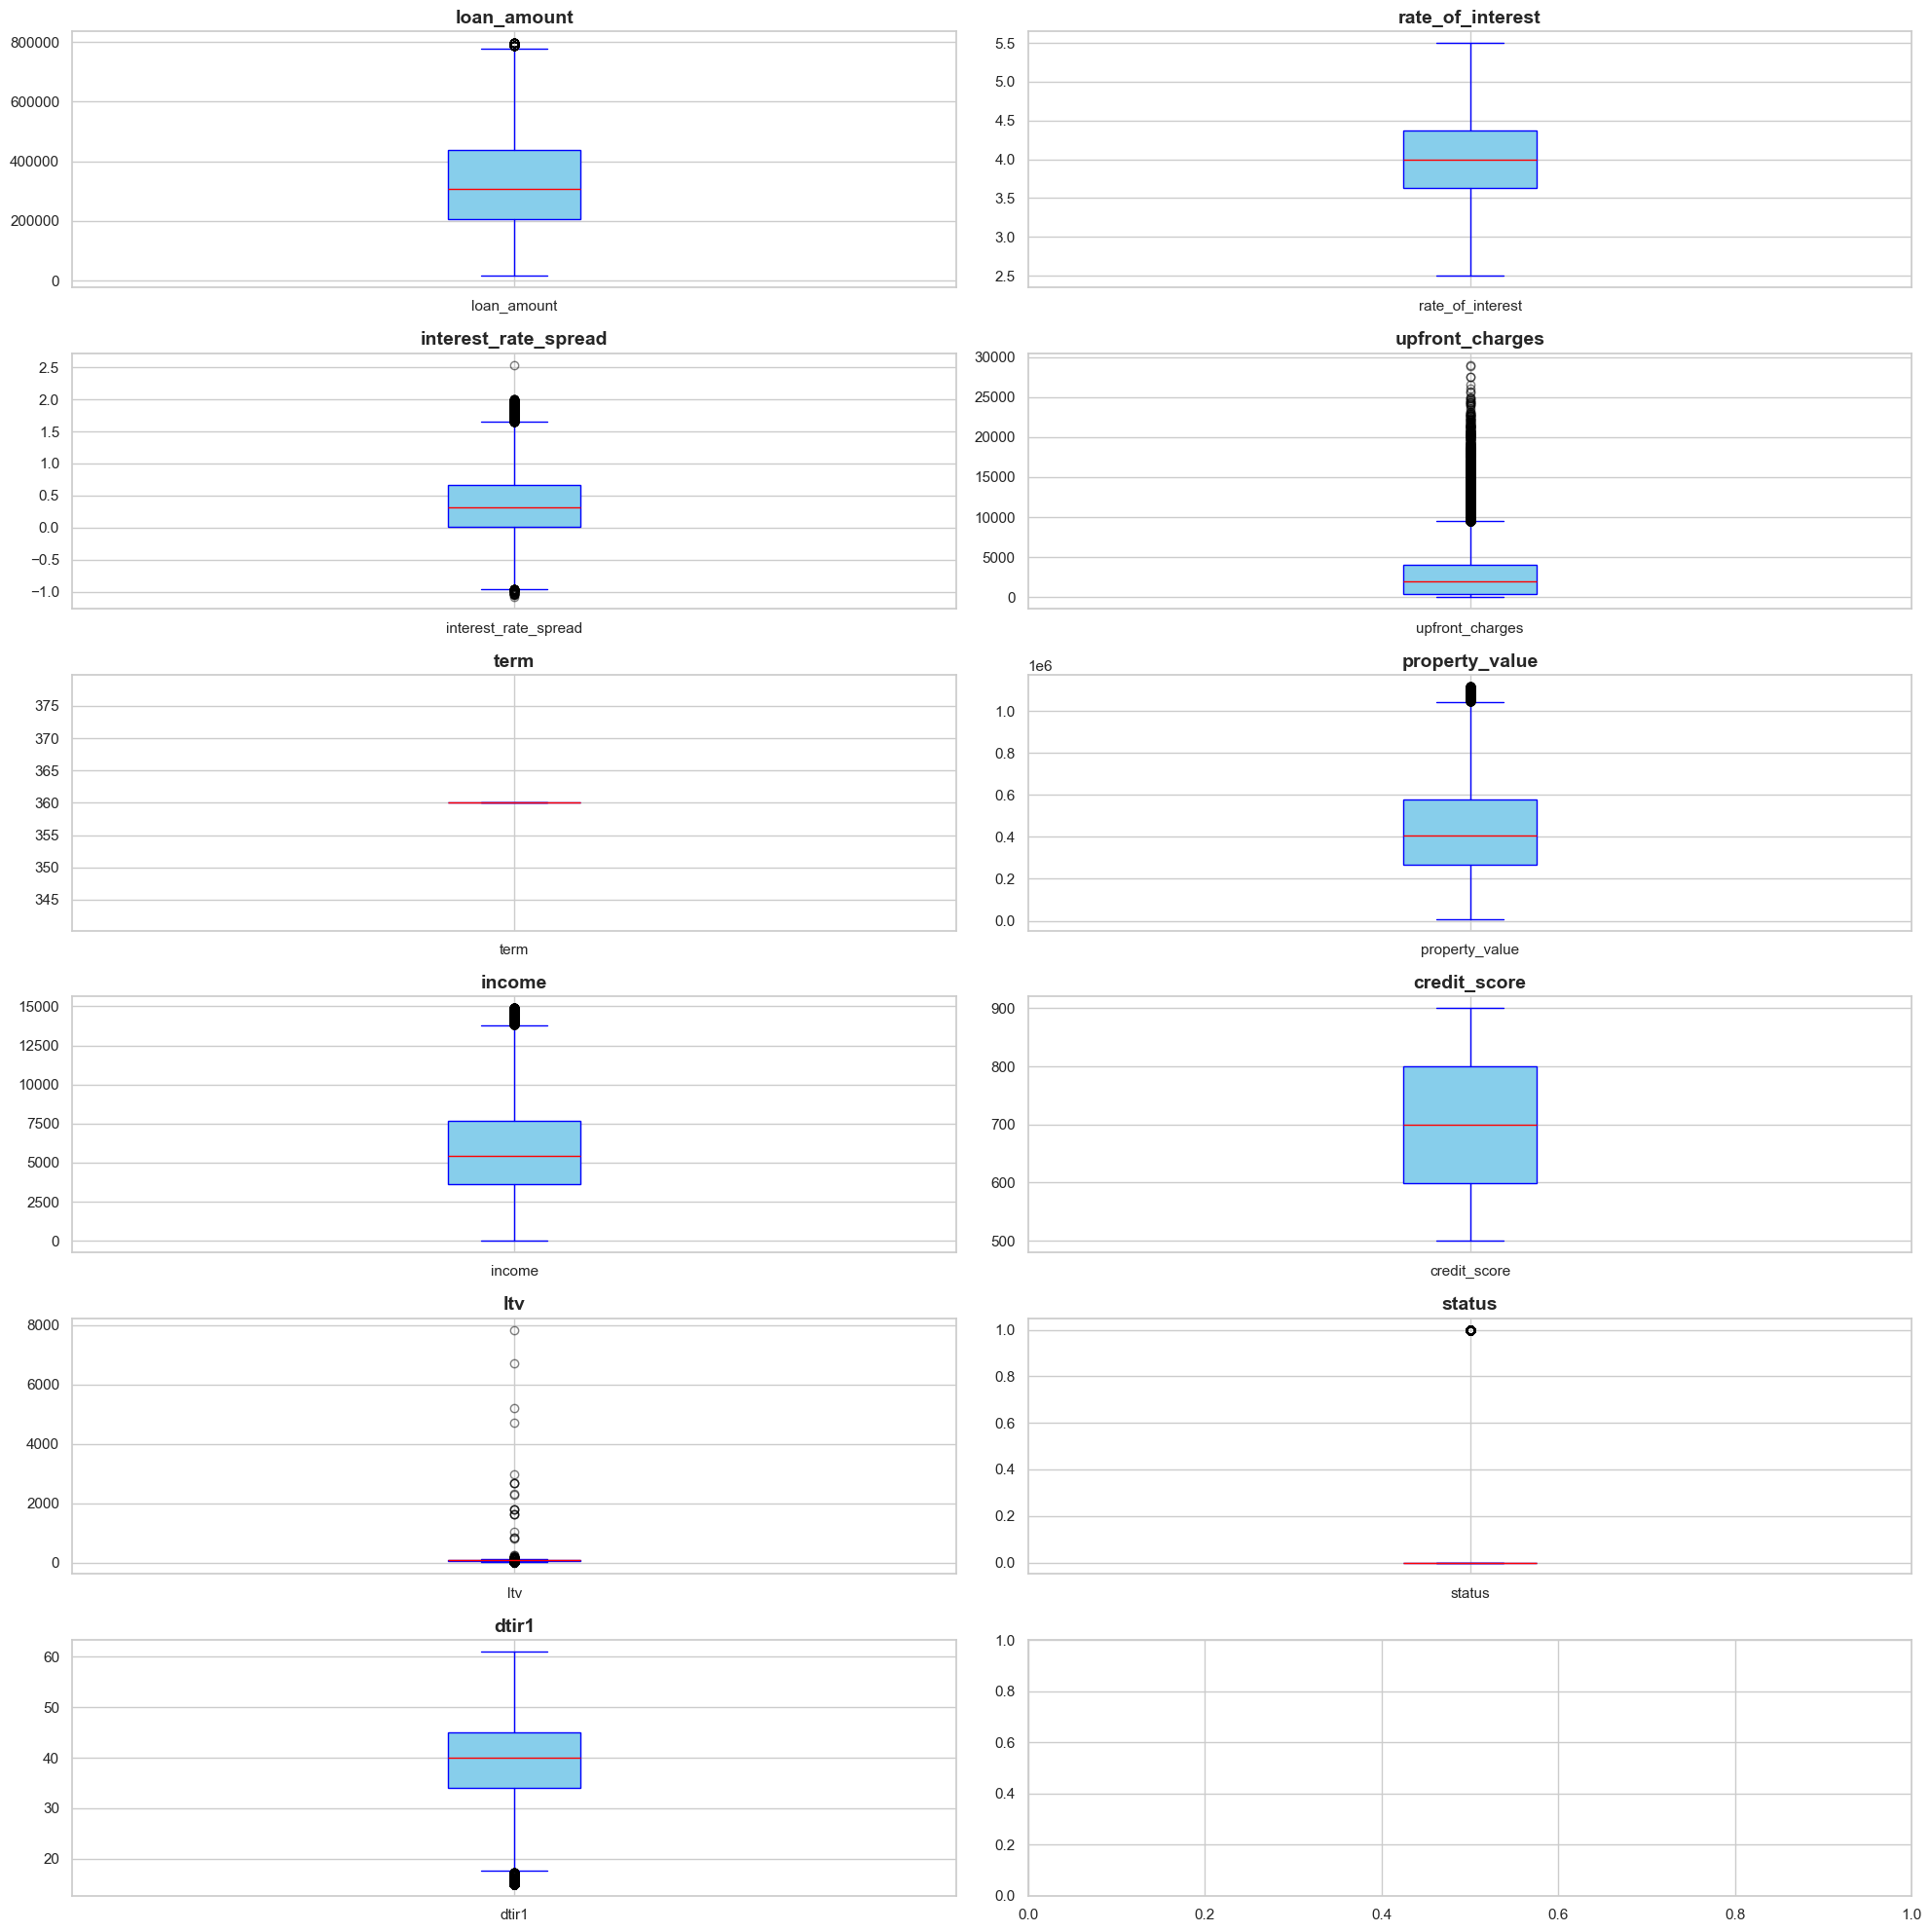

In [209]:
numeric_columns = df_full.select_dtypes(include=[np.number]).columns

fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20, 20))
fig.subplots_adjust(hspace=0.5, wspace=0.4)

for i, column in enumerate(numeric_columns):
    row = i // 2
    col = i % 2
    ax = df_full.boxplot(column=column, ax=axes[row, col], patch_artist=True,
                         boxprops=dict(facecolor='skyblue', color='blue'),
                         whiskerprops=dict(color='blue'),
                         capprops=dict(color='blue'),
                         medianprops=dict(color='red'),
                         flierprops=dict(marker='o', color='red', alpha=0.5))
    ax.set_title(column, fontsize=14, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.tight_layout()

plt.show()

In [274]:
Y=df_full['status']
X=df_full.drop('status',axis='columns')

# MODELO

## preprocesamiento

In [275]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105847 entries, 0 to 148664
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_amount                105847 non-null  float64
 1   rate_of_interest           105847 non-null  float64
 2   interest_rate_spread       105847 non-null  float64
 3   upfront_charges            105847 non-null  float64
 4   term                       105847 non-null  float64
 5   property_value             105847 non-null  float64
 6   income                     105847 non-null  float64
 7   credit_score               105847 non-null  float64
 8   ltv                        105847 non-null  float64
 9   dtir1                      105847 non-null  float64
 10  id                         105847 non-null  object 
 11  loan_limit                 105847 non-null  object 
 12  gender                     105847 non-null  object 
 13  approv_in_adv              105847 

In [261]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

OneHotEncoder = OneHotEncoder()
standard_scaler = StandardScaler()

imputer_cat = SimpleImputer(strategy="most_frequent")
imputer_num = SimpleImputer(strategy="mean")

In [262]:
col_transformer = make_column_transformer((standard_scaler, num_selector),
                                          (Label_Encoder, cat_selector), 
                        remainder = 'passthrough')

col_transformer 

ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001F84F874650>),
                                ('labelencoder', LabelEncoder(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001F7BFEC1F70>)])

In [326]:
Y_1=df_full['status']
X_1=df_full.drop('status',axis='columns')

In [327]:
obj=[]
for i in X_1.columns:
    if df[i].dtype=='object':
        obj.append(i)

In [328]:
for i in range(len(obj)):
    print(obj[i],X_1[obj[i]].unique())

In [329]:
new_df_cat = X_1[obj]

In [330]:
new_df_cat.isnull().sum()

Series([], dtype: float64)

In [331]:
new_df = pd.get_dummies(X_1, columns = new_df_cat.columns, dtype = float)
new_df

,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,term,property_value,income,credit_score,ltv,dtir1,...,construction_type,occupancy_type,secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,region,security_type
0,116500.0,3.583333,-0.031267,1386.013333,360.0,118000.000000,1740.0,758.0,98.728814,45.000000,...,sb,pr,home,1U,EXP,CIB,25-34,to_inst,south,direct
1,206500.0,3.708333,0.522967,1878.310000,360.0,251333.333333,4980.0,552.0,84.795549,34.666667,...,sb,pr,home,1U,EQUI,EXP,55-64,to_inst,North,direct
2,406500.0,4.560000,0.200000,595.000000,360.0,508000.000000,9480.0,834.0,80.019685,46.000000,...,sb,pr,home,1U,EXP,CIB,35-44,to_inst,south,direct
3,456500.0,4.250000,0.681000,704.900000,360.0,658000.000000,11880.0,587.0,69.376900,42.000000,...,sb,pr,home,1U,EXP,CIB,45-54,not_inst,North,direct
4,696500.0,4.000000,0.304200,0.000000,360.0,758000.000000,10440.0,602.0,91.886544,39.000000,...,sb,pr,home,1U,CRIF,EXP,25-34,not_inst,North,direct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148660,366500.0,3.875000,-0.117100,3643.160000,360.0,658000.000000,7200.0,851.0,55.699088,20.000000,...,sb,pr,home,1U,CIB,EXP,45-54,not_inst,North,direct
148661,346500.0,3.875000,0.667067,790.720000,360.0,358000.000000,7740.0,585.0,96.787710,43.666667,...,sb,pr,home,1U,EXP,CIB,25-34,to_inst,south,direct
148662,646500.0,3.625000,0.074300,7639.800000,360.0,828000.000000,13500.0,873.0,78.079710,31.000000,...,sb,pr,home,1U,CIB,EXP,45-54,not_inst,North,direct
148663,106500.0,4.208333,0.744533,2343.800000,360.0,151333.333333,1860.0,619.0,72.346651,37.666667,...,sb,pr,home,1U,EQUI,EXP,<25,to_inst,North,direct


In [332]:
new_df.columns

Index(['loan_amount', 'rate_of_interest', 'interest_rate_spread',
       'upfront_charges', 'term', 'property_value', 'income', 'credit_score',
       'ltv', 'dtir1', 'id', 'loan_limit', 'gender', 'approv_in_adv',
       'loan_type', 'loan_purpose', 'credit_worthiness', 'open_credit',
       'business_or_commercial', 'neg_ammortization', 'interest_only',
       'lump_sum_payment', 'construction_type', 'occupancy_type', 'secured_by',
       'total_units', 'credit_type', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'region', 'security_type'],
      dtype='object')

In [333]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105847 entries, 0 to 148664
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_amount                105847 non-null  float64
 1   rate_of_interest           105847 non-null  float64
 2   interest_rate_spread       105847 non-null  float64
 3   upfront_charges            105847 non-null  float64
 4   term                       105847 non-null  float64
 5   property_value             105847 non-null  float64
 6   income                     105847 non-null  float64
 7   credit_score               105847 non-null  float64
 8   ltv                        105847 non-null  float64
 9   dtir1                      105847 non-null  float64
 10  id                         105847 non-null  object 
 11  loan_limit                 105847 non-null  object 
 12  gender                     105847 non-null  object 
 13  approv_in_adv              105847 

In [276]:
numerical_cols =X.select_dtypes(include=['number']).columns
standard_scaler = StandardScaler()
X[numerical_cols] = standard_scaler.fit_transform(X[numerical_cols])


In [277]:
nominal_cols = X.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in nominal_cols:
    X[col] = label_encoder.fit_transform(X[col])

In [278]:
X.head()

,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,term,property_value,income,credit_score,ltv,dtir1,...,construction_type,occupancy_type,secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,region,security_type
0,-1.347961,-0.764915,-0.802748,-0.472642,0.0,-1.487027,-1.421783,0.503515,0.447464,0.620078,...,1,1,0,0,3,0,0,1,3,1
1,-0.757944,-0.525788,0.306583,-0.301725,0.0,-0.860085,-0.275708,-1.273215,0.153737,-0.562435,...,1,1,0,0,2,1,3,1,0,1
2,0.553204,1.103459,-0.339854,-0.747270,0.0,0.346777,1.316063,1.159008,0.053057,0.734515,...,1,1,0,0,3,0,1,1,3,1
3,0.880992,0.510426,0.622896,-0.709114,0.0,1.052086,2.165008,-0.971344,-0.171303,0.276768,...,1,1,0,0,3,0,2,0,0,1
4,2.454369,0.032173,-0.131292,-0.953844,0.0,1.522292,1.655641,-0.841970,0.303222,-0.066542,...,1,1,0,0,1,1,0,0,0,1


In [300]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=True)

In [301]:
pca = PCA(n_components=min(10, X_train.shape[1]))
pca.fit(X_train)

PCA(n_components=10)

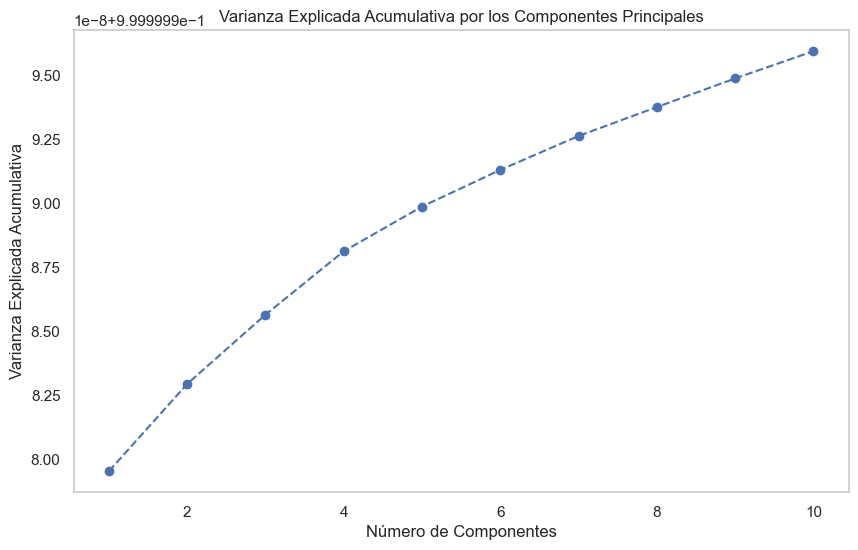

In [295]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Graficar la varianza acumulativa
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--', color='b')
plt.title('Varianza Explicada Acumulativa por los Componentes Principales')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulativa')
plt.grid()
plt.show()

In [302]:
pca = PCA(n_components=10, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [303]:
print("Número de columnas antes de PCA:", X_train.shape[1])
print("Número de columnas después de PCA:", X_train_pca.shape[1])

Número de columnas antes de PCA: 32
Número de columnas después de PCA: 10


## Modelo 1 de Deep Learning

In [372]:
model = tf.keras.models.Sequential([
    Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(1, activation='sigmoid')
])

In [373]:
model.compile(loss="binary_crossentropy",
                  optimizer="adam",
                  metrics=["accuracy"])

In [374]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                    validation_data=(X_test, y_test))

Epoch 1/100
2316/2316 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6378 - loss: 37.9261 - val_accuracy: 0.7593 - val_loss: 1.5874
Epoch 2/100
2316/2316 ━━━━━━━━━━━━━━━━━━━━ 2s 941us/step - accuracy: 0.7351 - loss: 1.6335 - val_accuracy: 0.7593 - val_loss: 1.4163
Epoch 3/100
2316/2316 ━━━━━━━━━━━━━━━━━━━━ 2s 933us/step - accuracy: 0.7582 - loss: 1.3649 - val_accuracy: 0.7593 - val_loss: 1.2010
Epoch 4/100
2316/2316 ━━━━━━━━━━━━━━━━━━━━ 2s 927us/step - accuracy: 0.7593 - loss: 1.1415 - val_accuracy: 0.7593 - val_loss: 0.9628
Epoch 5/100
2316/2316 ━━━━━━━━━━━━━━━━━━━━ 2s 937us/step - accuracy: 0.7565 - loss: 0.9181 - val_accuracy: 0.7593 - val_loss: 0.7759
Epoch 6/100
2316/2316 ━━━━━━━━━━━━━━━━━━━━ 2s 943us/step - accuracy: 0.7569 - loss: 0.7445 - val_accuracy: 0.7593 - val_loss: 0.6489
Epoch 7/100
2316/2316 ━━━━━━━━━━━━━━━━━━━━ 2s 923us/step - accuracy: 0.7572 - loss: 0.6374 - val_accuracy: 0.7593 - val_loss: 0.5872
Epoch 8/100
2316/2316 ━━━━━━━━━━━━━━━━━━━━ 2s 932us/step - accuracy: 0

In [375]:
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 512)            │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 278,789 (1.06 MB)

 Trainable params: 92,929 (363.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 185,860 (726.02 KB)

In [376]:
loss, acc = model.evaluate(X_train, y_train, batch_size=32)
print("Loss:", loss)
print("Accuracy:", acc)

2316/2316 ━━━━━━━━━━━━━━━━━━━━ 1s 449us/step - accuracy: 0.7582 - loss: 0.5532
Loss: 0.5543802380561829
Accuracy: 0.7571262717247009


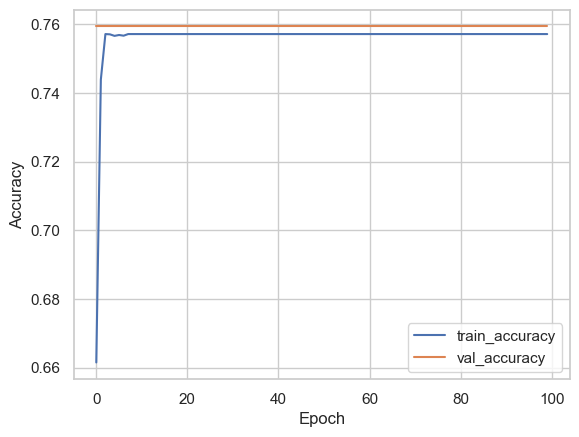

In [377]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [378]:
loss2, acc2 = model.evaluate(X_test, y_test, batch_size=32)
print("Loss:", loss2)
print("Accuracy:", acc2)

993/993 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - accuracy: 0.7590 - loss: 0.5522
Loss: 0.5518364906311035
Accuracy: 0.7593449950218201


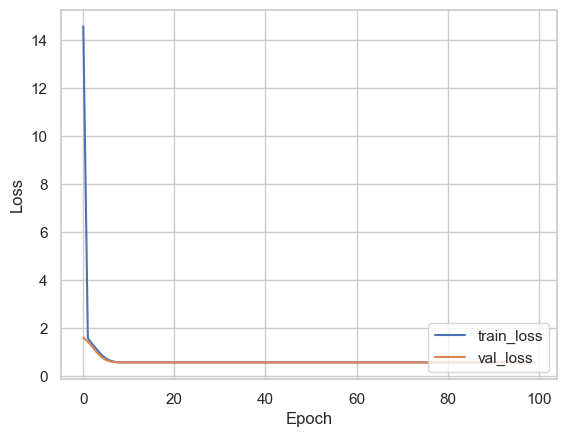

In [379]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

In [380]:
y_pred = model.predict(X_test)

993/993 ━━━━━━━━━━━━━━━━━━━━ 1s 494us/step


In [382]:
y_pred_binary = np.where(y_pred > 0.7, 1, 0)
y_pred_binary

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [383]:
print(classification_report(y_test, y_pred_binary))

              precision    recall  f1-score   support

         0.0       0.76      1.00      0.86     24113
         1.0       0.00      0.00      0.00      7642

    accuracy                           0.76     31755
   macro avg       0.38      0.50      0.43     31755
weighted avg       0.58      0.76      0.66     31755



c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



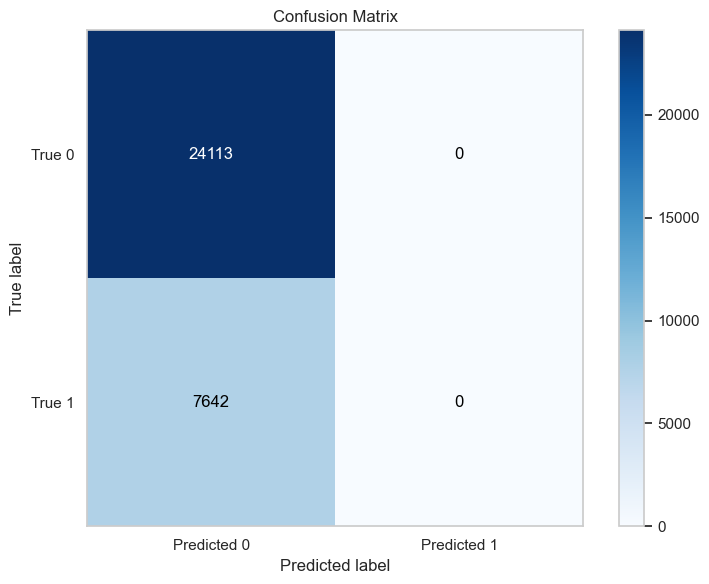

In [384]:
cm = confusion_matrix(y_test, y_pred_binary)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Predicted 0', 'Predicted 1'])
plt.yticks([0, 1], ['True 0', 'True 1'])
plt.xlabel('Predicted label')
plt.grid(False)
plt.ylabel('True label')

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()

AUC: 0.5


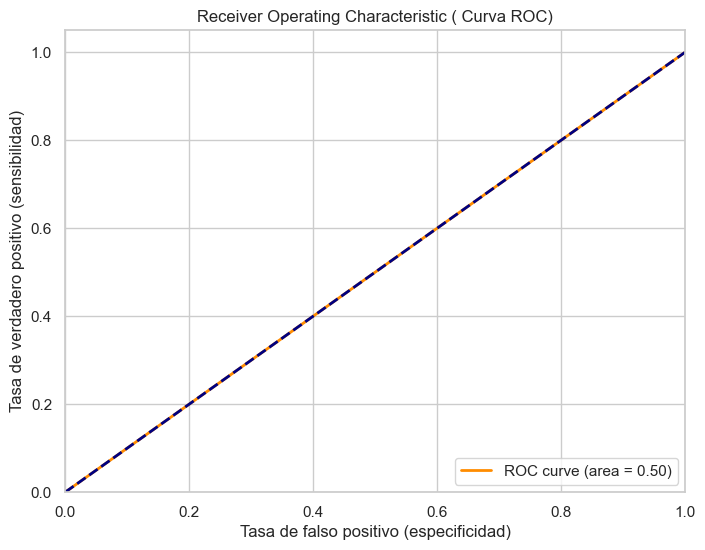

In [342]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_binary)

roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falso positivo (especificidad)')
plt.ylabel('Tasa de verdadero positivo (sensibilidad)')
plt.title('Receiver Operating Characteristic ( Curva ROC)')
plt.legend(loc="lower right")
plt.show()

## Deep Learning modelo 2

In [392]:
model_reg = tf.keras.models.Sequential([
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [394]:

model_reg.compile(loss="binary_crossentropy",
                  optimizer="adam",
                  metrics=["accuracy"])

In [398]:
history2 = model_reg.fit(X_train_pca, y_train, epochs=400, batch_size=32,
                    validation_data=(X_test_pca, y_test))

model.summary()

Epoch 1/400
2316/2316 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7537 - loss: 0.5676 - val_accuracy: 0.7593 - val_loss: 0.5697
Epoch 2/400
2316/2316 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7562 - loss: 0.5675 - val_accuracy: 0.7593 - val_loss: 0.5634
Epoch 3/400
2316/2316 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7573 - loss: 0.5659 - val_accuracy: 0.7593 - val_loss: 0.5589
Epoch 4/400
2316/2316 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7563 - loss: 0.5663 - val_accuracy: 0.7593 - val_loss: 0.5687
Epoch 5/400
2316/2316 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7575 - loss: 0.5678 - val_accuracy: 0.7593 - val_loss: 0.5595
Epoch 6/400
2316/2316 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7592 - loss: 0.5611 - val_accuracy: 0.7593 - val_loss: 0.5692
Epoch 7/400
2316/2316 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7574 - loss: 0.5700 - val_accuracy: 0.7593 - val_loss: 0.5633
Epoch 8/400
2316/2316 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7574 - loss: 0

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [415]:
loss3, acc3 = model_reg.evaluate(X_train_pca, y_train, batch_size=32)
print("Loss:", loss3)
print("Accuracy:", acc3)

2316/2316 ━━━━━━━━━━━━━━━━━━━━ 1s 541us/step - accuracy: 0.7645 - loss: 0.4669
Loss: 0.4670448303222656
Accuracy: 0.7651433348655701


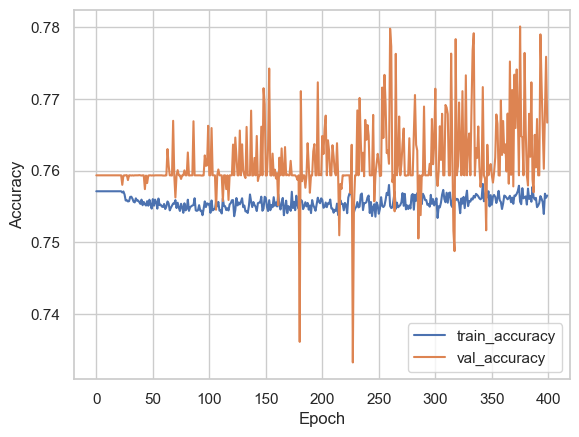

In [404]:
plt.plot(history2.history['accuracy'], label='train_accuracy')
plt.plot(history2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [417]:
loss4, acc4 = model_reg.evaluate(X_test_pca, y_test, batch_size=32)
print("Loss:", loss4)
print("Accuracy:", acc4)

993/993 ━━━━━━━━━━━━━━━━━━━━ 1s 529us/step - accuracy: 0.7661 - loss: 0.4636
Loss: 0.46475550532341003
Accuracy: 0.7666823863983154


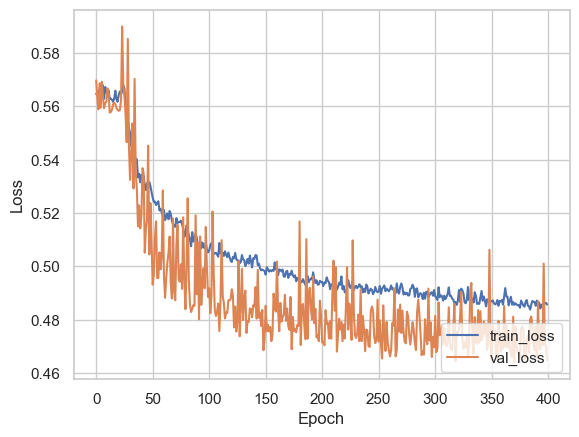

In [405]:
plt.plot(history2.history['loss'], label='train_loss')
plt.plot(history2.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

In [407]:
y_pred = model_reg.predict(X_test_pca)

993/993 ━━━━━━━━━━━━━━━━━━━━ 1s 600us/step


In [409]:
loss2, acc2 = model_reg.evaluate(X_test_pca, y_test, batch_size=32)
print("Loss:", loss2)
print("Accuracy:", acc2)

993/993 ━━━━━━━━━━━━━━━━━━━━ 1s 545us/step - accuracy: 0.7661 - loss: 0.4636
Loss: 0.46475550532341003
Accuracy: 0.7666823863983154


In [410]:
y_pred2 = model_reg.predict(X_test_pca)

993/993 ━━━━━━━━━━━━━━━━━━━━ 1s 538us/step


In [411]:
y_pred_binary2 = np.where(y_pred2 > 0.5, 1, 0)
y_pred_binary2

array([[1],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

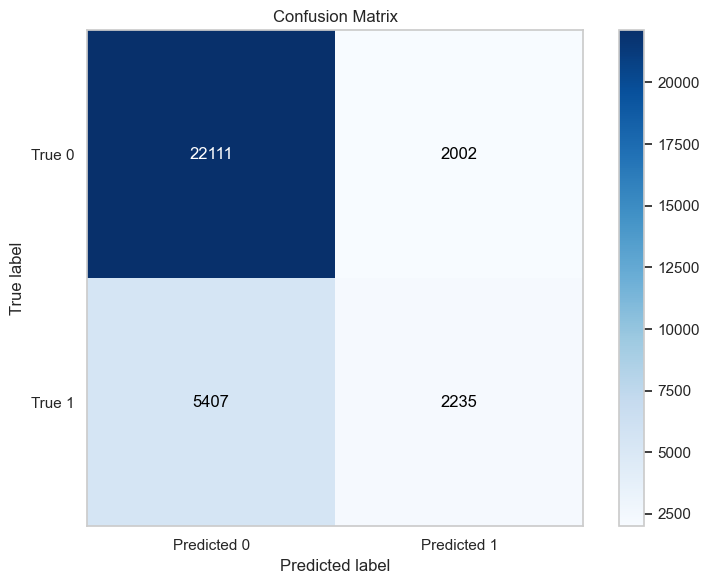

In [412]:
cm = confusion_matrix(y_test, y_pred_binary2)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Predicted 0', 'Predicted 1'])
plt.yticks([0, 1], ['True 0', 'True 1'])
plt.xlabel('Predicted label')
plt.grid(False)
plt.ylabel('True label')

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()

AUC: 0.6047184761775429


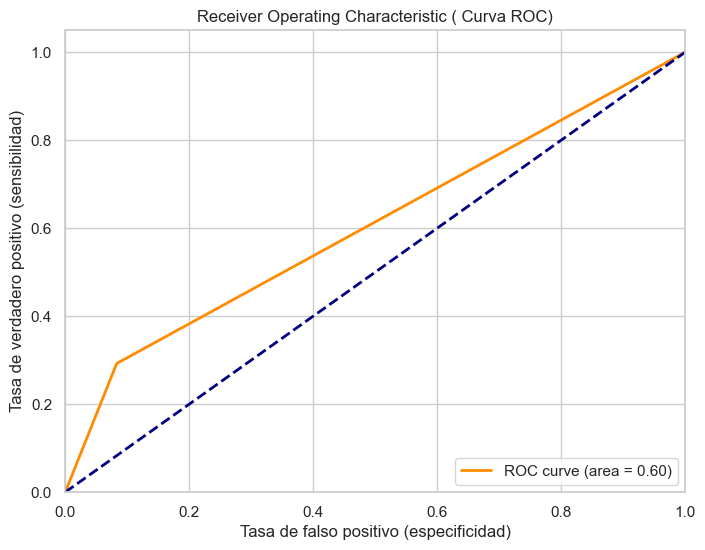

In [413]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_binary2)

roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falso positivo (especificidad)')
plt.ylabel('Tasa de verdadero positivo (sensibilidad)')
plt.title('Receiver Operating Characteristic ( Curva ROC)')
plt.legend(loc="lower right")
plt.show()

In [414]:
print(classification_report(y_test, y_pred_binary2))

              precision    recall  f1-score   support

         0.0       0.80      0.92      0.86     24113
         1.0       0.53      0.29      0.38      7642

    accuracy                           0.77     31755
   macro avg       0.67      0.60      0.62     31755
weighted avg       0.74      0.77      0.74     31755



## Random Forest

In [343]:
from sklearn.model_selection import GridSearchCV

In [344]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': [2, 4, 6],
    'bootstrap': [True, False],
}

forest_class = RandomForestClassifier()

grid_search = GridSearchCV(forest_class, param_grid, cv=5,
                          scoring = 'accuracy', verbose = 2, n_jobs = -1)

grid_search.fit(X_train_pca, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_features': [2, 4, 6],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=2)

In [345]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(mean_score), params)

0.9579438754890436 {'bootstrap': True, 'max_features': 2, 'n_estimators': 50}
0.9586410326007414 {'bootstrap': True, 'max_features': 2, 'n_estimators': 100}
0.9594221172562146 {'bootstrap': True, 'max_features': 2, 'n_estimators': 200}
0.9660322016821448 {'bootstrap': True, 'max_features': 4, 'n_estimators': 50}
0.96675844549888 {'bootstrap': True, 'max_features': 4, 'n_estimators': 100}
0.9669678260689062 {'bootstrap': True, 'max_features': 4, 'n_estimators': 200}
0.9708194835900494 {'bootstrap': True, 'max_features': 6, 'n_estimators': 50}
0.9707291093808057 {'bootstrap': True, 'max_features': 6, 'n_estimators': 100}
0.9715143541740273 {'bootstrap': True, 'max_features': 6, 'n_estimators': 200}
0.9600479338807224 {'bootstrap': False, 'max_features': 2, 'n_estimators': 50}
0.961115781782427 {'bootstrap': False, 'max_features': 2, 'n_estimators': 100}
0.9613404232700106 {'bootstrap': False, 'max_features': 2, 'n_estimators': 200}
0.9684183544865416 {'bootstrap': False, 'max_features': 

In [346]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 6, 'n_estimators': 200}

In [348]:
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(X_test)
final_predictions

array([0., 0., 0., ..., 1., 1., 0.])

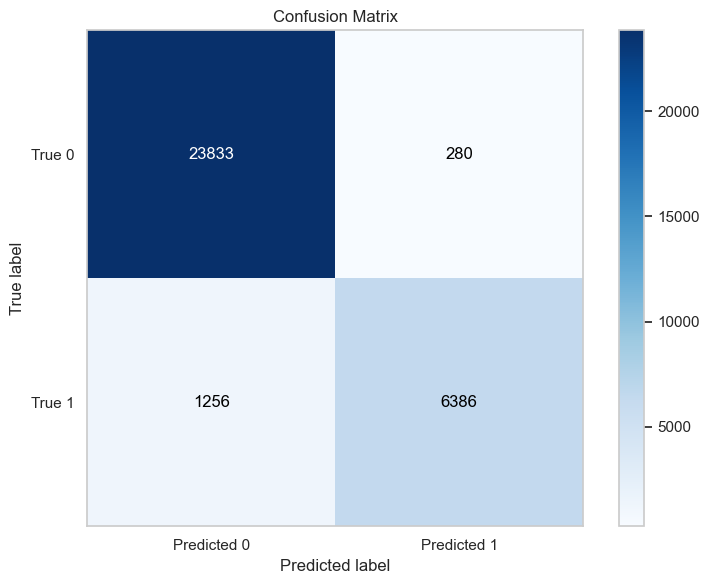

In [354]:
cm = confusion_matrix(y_test, final_predictions)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Predicted 0', 'Predicted 1'])
plt.yticks([0, 1], ['True 0', 'True 1'])
plt.xlabel('Predicted label')
plt.grid(False)
plt.ylabel('True label')

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()

In [418]:
loss5, acc5 = forest_class.evaluate(X_train, y_train, batch_size=32)
print("Loss:", loss5)
print("Accuracy:", acc5)

AttributeError: 'RandomForestClassifier' object has no attribute 'evaluate'

In [356]:
print("Final Model Metrics:")
print("Accuracy: ", accuracy_score(y_test, final_predictions))
print("Precision: ", precision_score(y_test, final_predictions, average='binary'))
print("Recall: ", recall_score(y_test, final_predictions, average='binary'))
print("F1 score: ", f1_score(y_test, final_predictions, average='binary'))

Final Model Metrics:
Accuracy:  0.951629664619745
Precision:  0.957995799579958
Recall:  0.8356451190787751
F1 score:  0.8926474699468828


In [357]:
print(classification_report(y_test, final_predictions))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97     24113
         1.0       0.96      0.84      0.89      7642

    accuracy                           0.95     31755
   macro avg       0.95      0.91      0.93     31755
weighted avg       0.95      0.95      0.95     31755



# CONCLUSIONES